In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.special import gamma, factorial, gammainc

# Integración
---
Vamos a utilizar el método Runge-Kutta de cuarto orden para integrar las funciones.

**Parámetros de integración:** Estos son los parámetros de entrada para el método Runge-Kutta:
  * `func`: Función que queremos integrar
  * `a, b, N`: Intervalo de integración, dado por $(a, b)$, y el número de intervalos en los que queremos segmentar el eje x, dado por $N$.
  * `tol`: Tolerancia. Este parámetro se define para facilitar la búsqueda de discontinuidades dentro del intervalo $(a, b)$.
  * `param_dict`: Estructura de diccionario que trae todos los parámetros de entrada de la función `func`. De esta manera, funciones que necesitan distinto número de parámetros de entrada pueden integrarse con la misma función `RK4()` presentada a continuación:

In [2]:
def RK4(func, a, b, N, tol, param_dict):
    deltat = float(b-a)/N
    yi = 0
    fi_list = [0]
    
    for i in range(N):
        
        ti = a + i*deltat
        k1 = deltat * func(ti, yi, param_dict)
        k2 = deltat * func(ti + 0.5*deltat, yi + 0.5*k1, param_dict)
        k3 = deltat * func(ti + 0.5*deltat, yi + 0.5*k2, param_dict)
        k4 = deltat * func(ti + deltat, yi + k3, param_dict)
        yi += (k1 + 2*k2 + 2*k3 + k4)/6.
        
        fi = func(ti, 0, param_dict)
        diff = fi-fi_list[-1]
        fi_list.append(fi)
        
        if(abs(diff) > tol):
            print("Se rompió el ciclo en el punto %.4f del eje x, ciclo %i"%(ti, i))
            break
            
    print("Diferencia f(x+dx) - f(x): ", diff)
    return yi

## Evaluación
---
Revisamos si nuestra función `RK4()` encuentra correctamente los valores para tres funciones:
 * Primero, para una distribución normal estándar integrada entre $(0, +\infty)$
 * Segundo, para la función $f(x) = \frac{1}{x}$ para $x\in(-5, 5)$
 * Tercero, para la función $f(x) = \frac{1}{1-x^2}$ para $x\in(0, 2)$
 
De esta manera, podemos ver si funciona para funciones continuas y discontinuas.

In [3]:
# TEST - funcion continua
def gausss(xx, y, t):
    return np.exp(-0.5*xx*xx)/np.sqrt(2*np.pi)

rer = RK4(gausss, -1000, 1.96, 1000, 0.5, 5)
print("Resultado: ", rer)

Diferencia f(x+dx) - f(x):  -0.1464398962035064
Resultado:  0.9749565158151665


In [38]:
x = np.linspace(0.0, 3.0, 1000)
for i in x:
    RK4(gausss, -1000, i, 1000, 0.5, 5)

Diferencia f(x+dx) - f(x):  0.005909853501554152
Diferencia f(x+dx) - f(x):  0.005794153954228276
Diferencia f(x+dx) - f(x):  0.0056782982626726874
Diferencia f(x+dx) - f(x):  0.005562289489589867
Diferencia f(x+dx) - f(x):  0.005446130704534313
Diferencia f(x+dx) - f(x):  0.005329824983778819
Diferencia f(x+dx) - f(x):  0.005213375410176413
Diferencia f(x+dx) - f(x):  0.0050967850730171405
Diferencia f(x+dx) - f(x):  0.004980057067925037
Diferencia f(x+dx) - f(x):  0.0048631944966722185
Diferencia f(x+dx) - f(x):  0.004746200467070083
Diferencia f(x+dx) - f(x):  0.004629078092831307
Diferencia f(x+dx) - f(x):  0.004511830493421853
Diferencia f(x+dx) - f(x):  0.0043944607939335745
Diferencia f(x+dx) - f(x):  0.004276972124935385
Diferencia f(x+dx) - f(x):  0.004159367622330601
Diferencia f(x+dx) - f(x):  0.004041650427249965
Diferencia f(x+dx) - f(x):  0.003923823685862082
Diferencia f(x+dx) - f(x):  0.0038058905492764916
Diferencia f(x+dx) - f(x):  0.003687854173367533
Diferencia f(x+

Diferencia f(x+dx) - f(x):  -0.013072279569757539
Diferencia f(x+dx) - f(x):  -0.013171135625302366
Diferencia f(x+dx) - f(x):  -0.013269650984284787
Diferencia f(x+dx) - f(x):  -0.013367823345025787
Diferencia f(x+dx) - f(x):  -0.013465650420713404
Diferencia f(x+dx) - f(x):  -0.013563129939343554
Diferencia f(x+dx) - f(x):  -0.013660259643935524
Diferencia f(x+dx) - f(x):  -0.013757037292486785
Diferencia f(x+dx) - f(x):  -0.013853460658193761
Diferencia f(x+dx) - f(x):  -0.013949527529425354
Diferencia f(x+dx) - f(x):  -0.014045235709891968
Diferencia f(x+dx) - f(x):  -0.01414058301861304
Diferencia f(x+dx) - f(x):  -0.01423556729015063
Diferencia f(x+dx) - f(x):  -0.014330186374536202
Diferencia f(x+dx) - f(x):  -0.014424438137485507
Diferencia f(x+dx) - f(x):  -0.014518320460347345
Diferencia f(x+dx) - f(x):  -0.014611831240285367
Diferencia f(x+dx) - f(x):  -0.01470496839031421
Diferencia f(x+dx) - f(x):  -0.01479772983938965
Diferencia f(x+dx) - f(x):  -0.014890113532402272
Dife

Diferencia f(x+dx) - f(x):  -0.023581116855030615
Diferencia f(x+dx) - f(x):  -0.023605153123293032
Diferencia f(x+dx) - f(x):  -0.023628704005037415
Diferencia f(x+dx) - f(x):  -0.023651770096376923
Diferencia f(x+dx) - f(x):  -0.023674352009348087
Diferencia f(x+dx) - f(x):  -0.023696450371768984
Diferencia f(x+dx) - f(x):  -0.023718065827359802
Diferencia f(x+dx) - f(x):  -0.023739199035450687
Diferencia f(x+dx) - f(x):  -0.023759850671107974
Diferencia f(x+dx) - f(x):  -0.02378002142497959
Diferencia f(x+dx) - f(x):  -0.023799712003138795
Diferencia f(x+dx) - f(x):  -0.023818923127182312
Diferencia f(x+dx) - f(x):  -0.023837655534067637
Diferencia f(x+dx) - f(x):  -0.02385590997596393
Diferencia f(x+dx) - f(x):  -0.0238736872203687
Diferencia f(x+dx) - f(x):  -0.023890988049810213
Diferencia f(x+dx) - f(x):  -0.023907813261968613
Diferencia f(x+dx) - f(x):  -0.02392416366951583
Diferencia f(x+dx) - f(x):  -0.023940040099954873
Diferencia f(x+dx) - f(x):  -0.023955443395712428
Difer

Diferencia f(x+dx) - f(x):  -0.02169623851264324
Diferencia f(x+dx) - f(x):  -0.02165674604124962
Diferencia f(x+dx) - f(x):  -0.021617024001941765
Diferencia f(x+dx) - f(x):  -0.021577074394416085
Diferencia f(x+dx) - f(x):  -0.02153689921856647
Diferencia f(x+dx) - f(x):  -0.021496500474183278
Diferencia f(x+dx) - f(x):  -0.021455880161057483
Diferencia f(x+dx) - f(x):  -0.021415040278691594
Diferencia f(x+dx) - f(x):  -0.021373982826409788
Diferencia f(x+dx) - f(x):  -0.02133270980307647
Diferencia f(x+dx) - f(x):  -0.021291223207166088
Diferencia f(x+dx) - f(x):  -0.02124952503659841
Diferencia f(x+dx) - f(x):  -0.021207617288677427
Diferencia f(x+dx) - f(x):  -0.02116550195992198
Diferencia f(x+dx) - f(x):  -0.021123181046145134
Diferencia f(x+dx) - f(x):  -0.021080656542170867
Diferencia f(x+dx) - f(x):  -0.021037930441944547
Diferencia f(x+dx) - f(x):  -0.020995004738257717
Diferencia f(x+dx) - f(x):  -0.02095188142281812
Diferencia f(x+dx) - f(x):  -0.020908562486090437
Diferen

Diferencia f(x+dx) - f(x):  -0.01341872391721792
Diferencia f(x+dx) - f(x):  -0.01336626435357638
Diferencia f(x+dx) - f(x):  -0.013313854866310232
Diferencia f(x+dx) - f(x):  -0.01326149659023114
Diferencia f(x+dx) - f(x):  -0.01320919065202128
Diferencia f(x+dx) - f(x):  -0.013156938170238025
Diferencia f(x+dx) - f(x):  -0.01310474025526498
Diferencia f(x+dx) - f(x):  -0.01305259800939701
Diferencia f(x+dx) - f(x):  -0.01300051252672893
Diferencia f(x+dx) - f(x):  -0.012948484893268358
Diferencia f(x+dx) - f(x):  -0.012896516186810411
Diferencia f(x+dx) - f(x):  -0.012844607477035093
Diferencia f(x+dx) - f(x):  -0.012792759825461818
Diferencia f(x+dx) - f(x):  -0.012740974285457111
Diferencia f(x+dx) - f(x):  -0.01268925190219098
Diferencia f(x+dx) - f(x):  -0.01263759371272244
Diferencia f(x+dx) - f(x):  -0.012586000745895436
Diferencia f(x+dx) - f(x):  -0.01253447402245169
Diferencia f(x+dx) - f(x):  -0.01248301455489554
Diferencia f(x+dx) - f(x):  -0.012431623347677286
Diferencia 

KeyboardInterrupt: 

In [4]:
# TEST 2 - funciones con discontinuidades
def func_test(xx, a, b):
    return 1./xx

def func_test2(xx, a, b):
    return 1./(1-xx**2)

reer  = RK4(func_test, -5, 5, 100000, 5, 5) # Funcion decreciente entre (-5, 0)
print("Resultado: ", reer)
print("-"*70)
reeer = RK4(func_test2, 0, 2, 100000, 5, 5) # Funcion creciente entre (0, 1)
print("Resultado: ", reeer)

Se rompió el ciclo en el punto -0.0044 del eje x, ciclo 49956
Diferencia f(x+dx) - f(x):  -5.050505050538504
Resultado:  -7.058578169325938
----------------------------------------------------------------------
Se rompió el ciclo en el punto 0.9986 del eje x, ciclo 49930
Diferencia f(x+dx) - f(x):  5.030178582967551
Resultado:  3.639064361152683


# Aplicación
---
Una vez definida la regla de integración, podemos aplicarlo al problema de interés

# Parámetros de la integral
---
Terminanos definiendo los parámetros $p, c, C, \eta, \beta, M, \lambda, \sigma$ estrictamente positivos.

In [122]:
'''# Indice: para las listas de parametros
K = 2

# Variables globales
p    = 0.9 # Valor original 0.6
c    = 2 #2
C    = 0.2 #0.99
eta  = [3., 4., 7., 8., 9., 5., 6.,] #0.5 # Coeficiente de aversion al riesgo - el que mas varia
beta = [2., 1.2, 2.5, 2.3, 0.8, 0.6, 3.]
M    = [13 , 22 , 30, 15, 40 , 50, 18]
lamb = [0.2, 0.4, 1., 2., 0.6, 3., 5.]
sig  = 0.3
alph = 0.8 #alpha(0.5)
rh   = [0.2, -0.3, 0.4, -0.5, 0.6, -0.7, 0.8] #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, 
                    "alph": alph, "rho": rh[K], "mu": mu}'''

# Parámetros numéricos

In [188]:
#-----------------------------------------------------------------------------
# ESTO FUE EN LO QUE ME AYUDO LAURA
#-----------------------------------------------------------------------------

# Indice: para las listas de parametros
K = 4

# Variables globales
p    = 0.9 # Valor original 0.6
c    = 2 #2
C    = 0.2 #0.99
eta  = [7. , 8. , 9. , 5. , 6.] #0.5 # Coeficiente de aversion al riesgo - el que mas varia
beta = [2.5, 2.3, 0.8, 0.6, 3.]
M    = [30 , 15 , 40 , 50 , 18]
lamb = [1. , 2. , 0.6, 3. , 5.]
sig  = 0.3
alph = 0.8 #alpha(0.5)
rh   = [0.4, -0.5, 0.6, -0.7, 0.8] #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, 
                    "alph": alph, "rho": rh[K], "mu": mu}

# Distribuciones de probabilidad
---
Ahora, definimos los parámetros para las distintas distribuciones de probabilidad que nos interesan.

In [189]:
# Nombre de la distribucion
dist = "Gamma"

# Parametros de la distribucion exponencial
exp_lam = 2

# Parametros de la distribucion Weibull
wei_lam = 1
wei_k   = 5

# Parametros de la distribucion Pareto
par_xm  = 2
par_al  = 2

# Parametros de la distribucion Gamma
gam_al  = 2
gam_bet = 2

# Creamos un diccionario que contenga los parametros de la distribucion: dist_params
dist_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet}

Una vez definidos los parámetros de nuestras funciones, guardamos estos en una estructura de diccionario. Esto se hace ya que las funciones que queremos integrar tienen un número distinto de parámetros de entrada. Por lo tanto, incluir todos los parámetros en una única estructura es más conveniente a la hora de aplicar nuestro método de integración `RK4()`.

In [190]:
# Diccionario que contiene todos los parametros

all_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet, "p": p, "c": c, "C": C, 
               "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, "alph": alph, "rho": rh[K],
               "mu": mu}

## Funciones de densidad
---

Ahora definimos las funciones de densidad para las funciones que nos interesan. En orden, son las densidad exponencial, Weibull, Pareto y gamma.

**NOTA:** Hay que tener cuidado con el soporte que tiene cada distribución. Si se incluyen valores de $x$ para los cuales $f(x)$ no está bien definida, los resultados estarán equivocados.

In [8]:
def dens_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if(param_dict["ff"] == "Exponencial"):
        return param_dict["exp_lam"] * np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        klam = np.true_divide(param_dict["wei_k"], param_dict["wei_lam"])
        x    = np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"] -1.0)
        temp = -1*np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"])
        expo = np.exp(temp)
        return klam*x*expo
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        #assert min(xx) > param_dict["par_xm"], "Los valores de x deben ser mayores que x_m"
        xx = xx[xx > param_dict["par_al"]]
        x    = param_dict["par_al"] * (param_dict["par_xm"]**(param_dict["par_al"]))
        deno = xx**(param_dict["par_al"] +1)
        return np.true_divide(x, deno)
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx >= 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bb = param_dict["gam_bet"]**(param_dict["gam_al"])
        x1 = xx**(param_dict["gam_al"] - 1)
        x2 = np.exp(-1*param_dict["gam_bet"] * xx)
        return norm*bb*x1*x2

## Funciones de distribución
---

Ahora definimos las funciones de distribución: exponencial, Weibull, Pareto y gamma.

**NOTA:** La misma que se incluyó para las funciones de densidad, hay que tener cuidado con el soporte de $F(x)$.

In [9]:
def dist_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if (param_dict["ff"] == "Exponencial"):
        return 1-np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        xlam = np.power(np.true_divide(xx, param_dict["wei_lam"]), (param_dict["wei_k"]))
        return 1-np.exp(-1*xlam)
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        xx = xx[xx > param_dict["par_al"]]
        x  = (np.true_divide(param_dict["par_xm"], xx))**(param_dict["par_al"])
        return 1-x
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx > 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bet  = param_dict["gam_bet"]*xx
        return norm * gammainc(param_dict["gam_al"], bet)

## Visualización
---
Visualizamos los resultados para distintas distribuciones de probabilidad

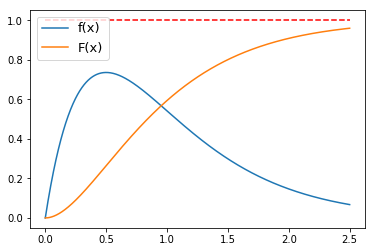

In [10]:
# Densidad de probabilidad - GAMMA
x = np.linspace(0, 2.5, 1000)
y = dens_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="f(x)")

# Distribucion de probabilidad
y = dist_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="F(x)")

plt.hlines(y=1.0, xmin=0, xmax=2.5, linestyles="--", color="r")
plt.legend(loc="best", fontsize=13)
plt.show()

# Condición de intersección
---

Las curvas $q(\pi, \kappa)$ y $h(\pi, \kappa)$ deberían intersectarse únicamente cuando:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

En esta parte, verificamos si la condición se cumple o no. Primero, definimos la función $y \ f(y)$ que va dentro de la integral:
$$\int_0^c y \ f(y) dy$$
A la función $y \ f(y)$ la llamamos `cond_func()`.

In [15]:
def cond_func(xx, y, param_dict):
    return xx*dens_func(xx, y, param_dict)

Una vez definida esta integral, podemos calcular el valor de $\pi$:
$$\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}$$

In [16]:
# Se calcula el valor numerico de pi segun lo especifica la condicion
x = np.linspace(0.0001, c)

# Calculamos el coeficiente que multiplica a los terminos dentro del corchete
con_coef = 1/(numerical_params["rho"]*numerical_params["eta"]*numerical_params["beta"]*numerical_params["sig"])

# Aplicamos la funcion RK4 para encontrar el valor de pi '
'''numerical_params["lamb"] *'''
pi_cond = con_coef*( numerical_params["lamb"]*(RK4(cond_func, 0.001, c, 100, 0.3, dist_params) + c*(1-dist_func(c, 0, dist_params)) ) - p)

Diferencia f(x+dx) - f(x):  -3.033891691853744e-11


In [17]:
numerical_params

{'C': 5,
 'M': 30,
 'alph': 0.8,
 'beta': 0.5,
 'c': 2,
 'eta': 5.0,
 'lamb': 1.0,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.4,
 'sig': 0.3}

In [18]:
# Revisamos el valor de pi_cond

pi_cond

0.06056247466713183

Para la distribución gamma, obtuvimos un valor de `pi_cond` ($\pi_h$) igual a `LO QUE HAYA DADO`

Una vez calculado el valor $\pi_h$, podemos insertarlo en la función $q(\pi_h, 0)$. De esta manera, sabremos si las curvas de nivel se intersectan si 
$$q(\pi_h, 0) > 0$$

**Ahora:** La función $q(\pi, \kappa)$ es:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz $$

Por lo tanto, debemos comenzar definiendo la función `q_integ` de la forma: $$ \frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$
La cual va dentro del término integral de la función $q(\pi, \kappa)$

In [19]:
# Definimos el termino de la integral de la funcion q

def q_integ(zz, y, param_dict):
    num = param_dict["C"]*np.exp(-1*param_dict["M"]*abs(zz))*(np.exp(zz)-1)
    den = np.float_power(1+(pi_cond * (np.exp(zz)-1) ), param_dict["eta"]) * np.float_power(abs(zz), 1+param_dict["alph"])
    return num/den

In [20]:
numerical_params

{'C': 5,
 'M': 30,
 'alph': 0.8,
 'beta': 0.5,
 'c': 2,
 'eta': 5.0,
 'lamb': 1.0,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.4,
 'sig': 0.3}

### Visualización de q_integ

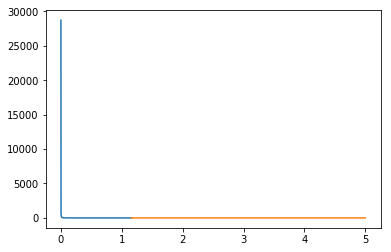

In [21]:
# AHORA: Visualizamos la funcion q_integ entre los limites definidios abajo:

# Limites de la integral para x<0
#lim_inf = -5
#lim_sup = -0.0001

lim_inf = 0.0001
lim_sup = 1.16

# Limites de la integral para x>0
#Lim_inf = 0.0001
#Lim_sup = 1.174#0.053 #0.2878 # Weibull
Lim_inf = 1.16
Lim_sup = 5#0.053 #0.2878 # Weibull

x = np.linspace(0.2*lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
#plt.show()

x = np.linspace(Lim_inf, Lim_sup, 1000000)
plt.plot(x, q_integ(x, 0, numerical_params))

plt.show()

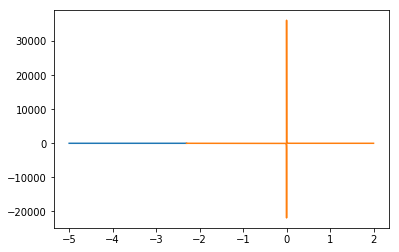

In [22]:
# Nuevamente graficamos la funcion para mas valores de x

# Limites de la integral para x<0
lim_inf = -5.0
lim_sup = -2.301
# Limites de la integral para x>0
Lim_inf = -2.301
Lim_sup = 2.0 # 0.2878

x = np.linspace(lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))

x = np.linspace(Lim_inf, Lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
plt.show()

#RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e25, all_params)

Es claro que hay una discontinuidad en el cero, y más allá del 0.053, las soluciones son complejas. Sin embargo, como la función es continua a ambos lados del cero, podemos separa la integral para los términos menores a cero y los términos mayores a cero.

## Evaluación de la condición
---
Ya que $\pi_h>0$, definimos la función `q_func` como la función:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Y evaluamos:

In [23]:
# Limites de la integral para x<0
#lim_inf = -5
#lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 10 # EXPONENECIAL: 0.053 # 0.2878 

# Ahora definimos la funcion q

def q_func(pp, kk, param_dict):
    fix  = param_dict["mu"]-param_dict["eta"]*param_dict["sig"]*(param_dict["sig"]*pp - param_dict["rho"]*param_dict["beta"]*kk)
    
    # Evaluamos la integral sobre los reales positivos
    #RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e22, param_dict)
    
    RK2  = RK4(q_integ, Lim_inf,  Lim_sup, 100000, 500e20, param_dict)
    print("RK2: %.4f"%(RK2))
    return fix + RK2 #+ RK1

In [24]:
# Calculamos el valor numerico de la funcion q segun la condicion

cond_test = q_func(pi_cond, 0, numerical_params)

Diferencia f(x+dx) - f(x):  -7.281631892928702e-146
RK2: 7.6817


In [25]:
# Revisamos el valor numerico de la condicion a ver si da positivo o negativo

cond_test

7.744485230355701

# Resultado: condición
---
La condición $q(\pi_c, 0) = -1.636078 \cdot 10^{20}$. Es decir, nos da muy negativa. Por lo tanto, para los parámetros escogidos, las curvas de nivel no deberían intersectarse.

# Curvas de nivel
---
La condición:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

Es *suficiente*, mas no necesaria, para que las carvas de nivel $q(\pi, \kappa) = 0$ y $h(\pi, \kappa) = 0$ se intercepten. 

La función $q(\pi, \kappa)$ se define como: $$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

La función $h(\pi, \kappa)$ se define como: $$h(\pi, \kappa) = p+\eta\beta\left[ \rho\sigma\pi-\beta\kappa \right] - \lambda\left\{\int_{0}^{c}\frac{y \ f(y)}{\left[1-\kappa y\right]^{\eta}} dy + \frac{c[1-F(c)]}{[1-\kappa c]^{\eta}}\right\} $$

---

## Tres casos de interés

 1. $\pi \geq 0$ y la función $q(\pi, \kappa)$ como se define arriba.
 2. $\pi \leq 1$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, 0]$
 3. $\pi \in [0, 1]$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, +\infty)$


 * Por lo tanto, para la primera ecuación, evaluaremos valores de $\pi$ y obtendremos el $\kappa$ dado por esta ecuación. Iterando sobre múltiples $\pi$, tendremos una curva de nivel donde la ecuación $q(\pi, \kappa)$ sea cero.
 
 * Para la segunda ecuación tendremos lo converso. Iterando valores de $\kappa$ obtendremos un conjunto de valores que harán que la función $h(\pi, \kappa)$ sea cero
 
Graficando los resultados obtenidos, veremos si las curvas llegan a intersectarse.
 
## Caso 1

 * $\pi \geq 0$

La función $q(\pi, \kappa)$ se hará cero cuando:

$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Mientras tanto, $h(\pi, \kappa)$ se hará cero cuando:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

# Primera curva de nivel
---
# TENER CUIDADO CON LOS LIMITES
Comenzamos evaluando la función
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Nuevamente, debemos comenzar definiendo la función que va dentro de la integral. En este caso es la función `kappa_int()` definida como:
$$\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}$$

Podemos ver que en su definición, el tercer argumento que acepta esta función (`pi_par`) será el valor de $\pi$ que pondremos a iterar para poder sacar la curva de nivel.

In [11]:
def kappa_int(xx, y, pi_par):
    num = (np.exp(xx)-1) * all_params["C"]*np.exp(-1*all_params["M"]*abs(xx)) #*(np.exp(xx)-1)
    den = np.float_power(1+(pi_par*(np.exp(xx)-1)), eta[K]) * np.float_power(abs(xx), 1+all_params["alph"])
    
    return num/den

### Visualización
Vemos cómo se ve la función `kappa_int()` para un valor de $\pi=0.21$ arbitrario

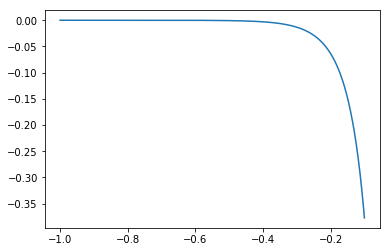

In [43]:
x = np.linspace(-1, -0.1, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

In [143]:
for i in range(1, len(y)):
    print(y[i]-y[i-1])

-1.5564199588550183e-15
-1.577326829196884e-15
-1.5985144353553353e-15
-1.619986545859245e-15
-1.6417469798139212e-15
-1.663799607573721e-15
-1.6861483514380156e-15
-1.7087971863437466e-15
-1.731750140567803e-15
-1.7550112964532016e-15
-1.77858479112343e-15
-1.8024748172238235e-15
-1.8266856236655184e-15
-1.8512215163791733e-15
-1.87608685908101e-15
-1.9012860740467307e-15
-1.92682364290212e-15
-1.952704107409054e-15
-1.9789320702845007e-15
-2.0055121960121024e-15
-2.0324492116668547e-15
-2.0597479077664973e-15
-2.0874131391110634e-15
-2.115449825649945e-15
-2.1438629533611765e-15
-2.172657575125846e-15
-2.2018388116375693e-15
-2.2314118523039883e-15
-2.2613819561729314e-15
-2.2917544528658183e-15
-2.3225347435235366e-15
-2.3537283017680945e-15
-2.3853406746718213e-15
-2.417377483749566e-15
-2.4498444259448096e-15
-2.482747274657105e-15
-2.5160918807588604e-15
-2.5498841736315618e-15
-2.584130162231935e-15
-2.618835936145484e-15
-2.6540076666742377e-15
-2.6896516079395367e-15
-2.725774

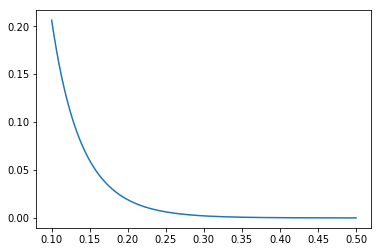

In [44]:
x = np.linspace(0.1, 0.5, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

In [51]:
for i in range(1, len(y)):
    print(y[i]-y[i-1])

-0.005237383623177161
-0.005215534425546231
-0.005193782342157061
-0.005172126904834151
-0.0051505676479013385
-0.005129104108154481
-0.005107735824859461
-0.005086462339730202
-0.005065283196915127
-0.005044197942973838
-0.005023206126888224
-0.005002307300019382
-0.00498150101610495
-0.004960786831254227
-0.004940164303918193
-0.004919632994881296
-0.004899192467263225
-0.004878842286470286
-0.004858582020216051
-0.004838411238494933
-0.004818329513559316
-0.004798336419924887
-0.0047784315343391
-0.004758614435781405
-0.004738884705443702
-0.004719241926719686
-0.004699685685190413
-0.004680215568606316
-0.004660831166890755
-0.004641532072109156
-0.004622317878462789
-0.004603188182285667
-0.004584142582016115
-0.004565180678191005
-0.004546302073444419
-0.004527506372474344
-0.0045087931820471105
-0.004490162110985185
-0.004471612770135858
-0.004453144772392115
-0.004434757732642236
-0.004416451267800436
-0.004398224996755351
-0.004380078540377141
-0.004362011521522824
-0.00434402

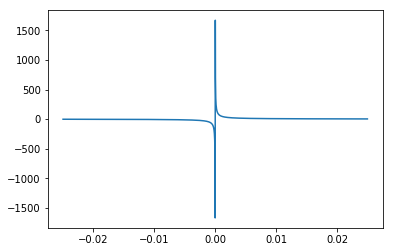

In [45]:
# Evaluamos como se ve cuando pasa por x=0

x = np.linspace(-0.025, 0.025, 2000)
y = kappa_int(x, 0.0, 0.21)
plt.plot(x, y)
plt.show()

In [15]:
# Integramos la funcion desde -50 hasta 0.1

erer = %time RK4(kappa_int, -50, 0.1, 10000, 1e216, 0.21)

Diferencia f(x+dx) - f(x):  -0.015203409528912387
CPU times: user 315 ms, sys: 6.11 ms, total: 321 ms
Wall time: 320 ms


**Ahora:** Podemos calcular finalmente las curvas de nivel. La función `kappa_level()` se define como:
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

In [17]:
Lim_inf = 0.00001
Lim_sup = 0.5

print(Lim_inf, Lim_sup)
numerical_params

1e-05 0.5


{'C': 0.2,
 'M': 30,
 'alph': 0.8,
 'beta': 2.5,
 'c': 2,
 'eta': 7.0,
 'lamb': 1.0,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.4,
 'sig': 0.3}

In [18]:
#def kappa_level(zz, y, param_dict):
def kappa_level(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        #RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
        print(kapp[i])
    
    kapp = np.array(kapp)
    return pi_it, kapp

# Aplicación de los casos
---
## Caso 1:
Integramos desde 0 hasta $\infty$ para valores de $\pi$:
$$\pi \geq 0$$

In [103]:
numerical_params

{'C': 0.2,
 'M': 40,
 'alph': 0.8,
 'beta': 0.8,
 'c': 2,
 'eta': 9.0,
 'lamb': 0.6,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.6,
 'sig': 0.3}

In [191]:
# Limites de la integral para x>0
Lim_inf = 0.00001
Lim_sup = 0.5

p_lvl1, k_lvl1 = kappa_level(1e-4, 5., 1000, all_params)

Diferencia f(x+dx) - f(x):  -5.388422737404798e-07
-0.14154686117694384
Diferencia f(x+dx) - f(x):  -5.298507279353847e-07
-0.14087868632004055
Diferencia f(x+dx) - f(x):  -5.210297338192112e-07
-0.14021062328031425
Diferencia f(x+dx) - f(x):  -5.123757211035395e-07
-0.1395426714112431
Diferencia f(x+dx) - f(x):  -5.038851994524873e-07
-0.1388748300726293
Diferencia f(x+dx) - f(x):  -4.955547566475895e-07
-0.13820709863050673
Diferencia f(x+dx) - f(x):  -4.873810567932062e-07
-0.13753947645704942
Diferencia f(x+dx) - f(x):  -4.793608385594175e-07
-0.1368719629304882
Diferencia f(x+dx) - f(x):  -4.7149091346483646e-07
-0.13620455743502202
Diferencia f(x+dx) - f(x):  -4.637681641967876e-07
-0.1355372593607361
Diferencia f(x+dx) - f(x):  -4.5618954296783884e-07
-0.13487006810351657
Diferencia f(x+dx) - f(x):  -4.487520699104032e-07
-0.13420298306497067
Diferencia f(x+dx) - f(x):  -4.4145283150610263e-07
-0.1335360036523492
Diferencia f(x+dx) - f(x):  -4.3428897905099155e-07
-0.13286912927

Diferencia f(x+dx) - f(x):  -9.936112533899335e-08
-0.06597192944569474
Diferencia f(x+dx) - f(x):  -9.807325648426942e-08
-0.065313430066697
Diferencia f(x+dx) - f(x):  -9.680467619868522e-08
-0.06465499528047007
Diferencia f(x+dx) - f(x):  -9.555505794534246e-08
-0.06399662482539123
Diferencia f(x+dx) - f(x):  -9.432408132655798e-08
-0.06333831844154111
Diferencia f(x+dx) - f(x):  -9.311143195762884e-08
-0.06268007587068407
Diferencia f(x+dx) - f(x):  -9.191680134329926e-08
-0.06202189685625609
Diferencia f(x+dx) - f(x):  -9.073988675705845e-08
-0.06136378114334556
Diferencia f(x+dx) - f(x):  -8.958039112303882e-08
-0.06070572847868212
Diferencia f(x+dx) - f(x):  -8.843802290059586e-08
-0.06004773861061891
Diferencia f(x+dx) - f(x):  -8.731249597136648e-08
-0.05938981128912013
Diferencia f(x+dx) - f(x):  -8.620352952886843e-08
-0.05873194626574159
Diferencia f(x+dx) - f(x):  -8.511084797047985e-08
-0.0580741432936237
Diferencia f(x+dx) - f(x):  -8.40341807918431e-08
-0.05741640212746

Diferencia f(x+dx) - f(x):  -2.4794325206217177e-08
0.011996458560474555
Diferencia f(x+dx) - f(x):  -2.4536753176358355e-08
0.012648740206343368
Diferencia f(x+dx) - f(x):  -2.428228644296608e-08
0.013300979630276833
Diferencia f(x+dx) - f(x):  -2.4030882463823073e-08
0.013953176965689257
Diferencia f(x+dx) - f(x):  -2.3782499348315437e-08
0.01460533234533675
Diferencia f(x+dx) - f(x):  -2.3537095846419756e-08
0.01525744590132204
Diferencia f(x+dx) - f(x):  -2.3294631337878434e-08
0.01590951776509804
Diferencia f(x+dx) - f(x):  -2.3055065821605006e-08
0.016561548067473585
Diferencia f(x+dx) - f(x):  -2.281835990526627e-08
0.017213536938616138
Diferencia f(x+dx) - f(x):  -2.2584474795045676e-08
0.017865484508057604
Diferencia f(x+dx) - f(x):  -2.2353372285617645e-08
0.018517390904698068
Diferencia f(x+dx) - f(x):  -2.2125014750296774e-08
0.01916925625681032
Diferencia f(x+dx) - f(x):  -2.189936513135774e-08
0.019821080692044
Diferencia f(x+dx) - f(x):  -2.167638693053561e-08
0.02047286

Diferencia f(x+dx) - f(x):  -8.130620607844799e-09
0.0880573681854716
Diferencia f(x+dx) - f(x):  -8.06015664076006e-09
0.08870547189942495
Diferencia f(x+dx) - f(x):  -7.990402623429467e-09
0.08935354547106349
Diferencia f(x+dx) - f(x):  -7.921350411300466e-09
0.09000158897951525
Diferencia f(x+dx) - f(x):  -7.852991964517269e-09
0.09064960250358989
Diferencia f(x+dx) - f(x):  -7.785319346440981e-09
0.09129758612177914
Diferencia f(x+dx) - f(x):  -7.718324722176824e-09
0.09194553991225822
Diferencia f(x+dx) - f(x):  -7.652000357128143e-09
0.09259346395288973
Diferencia f(x+dx) - f(x):  -7.58633861558631e-09
0.0932413583212231
Diferencia f(x+dx) - f(x):  -7.52133195932179e-09
0.09388922309449706
Diferencia f(x+dx) - f(x):  -7.456972946211098e-09
0.09453705834964225
Diferencia f(x+dx) - f(x):  -7.3932542288835625e-09
0.09518486416328156
Diferencia f(x+dx) - f(x):  -7.330168553377187e-09
0.09583264061173234
Diferencia f(x+dx) - f(x):  -7.267708757835172e-09
0.09648038777100836
Diferencia

Diferencia f(x+dx) - f(x):  -2.9427043367325353e-09
0.17014884443145303
Diferencia f(x+dx) - f(x):  -2.9211152736536578e-09
0.1707936623119119
Diferencia f(x+dx) - f(x):  -2.899710526328578e-09
0.17143845802782356
Diferencia f(x+dx) - f(x):  -2.8784883011117733e-09
0.17208323162863404
Diferencia f(x+dx) - f(x):  -2.857446823941228e-09
0.17272798316362162
Diferencia f(x+dx) - f(x):  -2.836584340099915e-09
0.17337271268189886
Diferencia f(x+dx) - f(x):  -2.81589911398318e-09
0.17401742023241076
Diferencia f(x+dx) - f(x):  -2.7953894288677378e-09
0.1746621058639374
Diferencia f(x+dx) - f(x):  -2.7750535866843515e-09
0.17530676962509503
Diferencia f(x+dx) - f(x):  -2.754889907791939e-09
0.17595141156433436
Diferencia f(x+dx) - f(x):  -2.734896730758006e-09
0.1765960317299443
Diferencia f(x+dx) - f(x):  -2.7150724121386817e-09
0.17724063017005173
Diferencia f(x+dx) - f(x):  -2.695415326263071e-09
0.17788520693262008
Diferencia f(x+dx) - f(x):  -2.6759238650205676e-09
0.17852976206545385
Dif

Diferencia f(x+dx) - f(x):  -1.2566354299602325e-09
0.24995115229190407
Diferencia f(x+dx) - f(x):  -1.2486217208343043e-09
0.25059355320727494
Diferencia f(x+dx) - f(x):  -1.240667515207857e-09
0.25123593701432695
Diferencia f(x+dx) - f(x):  -1.2327723091654925e-09
0.25187830374645903
Diferencia f(x+dx) - f(x):  -1.2249356035825643e-09
0.2525206534369717
Diferencia f(x+dx) - f(x):  -1.2171569040749388e-09
0.25316298611906796
Diferencia f(x+dx) - f(x):  -1.2094357209490995e-09
0.2538053018258524
Diferencia f(x+dx) - f(x):  -1.2017715691521583e-09
0.2544476005903331
Diferencia f(x+dx) - f(x):  -1.1941639682240652e-09
0.2550898824454214
Diferencia f(x+dx) - f(x):  -1.186612442248678e-09
0.25573214742393147
Diferencia f(x+dx) - f(x):  -1.1791165198062765e-09
0.2563743955585817
Diferencia f(x+dx) - f(x):  -1.1716757339265644e-09
0.2570166268819953
Diferencia f(x+dx) - f(x):  -1.1642896220421227e-09
0.25765884142669904
Diferencia f(x+dx) - f(x):  -1.1569577259423128e-09
0.2583010392251262
D

0.3275663101115838
Diferencia f(x+dx) - f(x):  -6.029443274500971e-10
0.3282068580434051
Diferencia f(x+dx) - f(x):  -5.995384419926085e-10
0.3288473922921274
Diferencia f(x+dx) - f(x):  -5.96154965624525e-10
0.32948791288160933
Diferencia f(x+dx) - f(x):  -5.927937301210668e-10
0.33012841983564845
Diferencia f(x+dx) - f(x):  -5.89454568675665e-10
0.33076891317797785
Diferencia f(x+dx) - f(x):  -5.86137315886965e-10
0.33140939293227045
Diferencia f(x+dx) - f(x):  -5.828418077454266e-10
0.3320498591221373
Diferencia f(x+dx) - f(x):  -5.795678816204658e-10
0.33269031177112646
Diferencia f(x+dx) - f(x):  -5.763153762475775e-10
0.3333307509027262
Diferencia f(x+dx) - f(x):  -5.730841317155571e-10
0.33397117654036296
Diferencia f(x+dx) - f(x):  -5.698739894540137e-10
0.33461158870740193
Diferencia f(x+dx) - f(x):  -5.666847922207566e-10
0.3352519874271483
Diferencia f(x+dx) - f(x):  -5.635163840895869e-10
0.33589237272284617
Diferencia f(x+dx) - f(x):  -5.603686104380281e-10
0.3365327446176

Diferencia f(x+dx) - f(x):  -3.0859627136395846e-10
0.40817478556868625
Diferencia f(x+dx) - f(x):  -3.0703593636207943e-10
0.40881377898217464
Diferencia f(x+dx) - f(x):  -3.054847931227715e-10
0.4094527612900551
Diferencia f(x+dx) - f(x):  -3.039427798487774e-10
0.41009173250977954
Diferencia f(x+dx) - f(x):  -3.02409835209664e-10
0.41073069265875906
Diferencia f(x+dx) - f(x):  -3.0088589833778937e-10
0.4113696417543626
Diferencia f(x+dx) - f(x):  -2.993709088244875e-10
0.4120085798139193
Diferencia f(x+dx) - f(x):  -2.978648067162172e-10
0.41264750685471846
Diferencia f(x+dx) - f(x):  -2.963675325106973e-10
0.4132864228940073
Diferencia f(x+dx) - f(x):  -2.9487902715326055e-10
0.4139253279489936
Diferencia f(x+dx) - f(x):  -2.933992320330254e-10
0.41456422203684473
Diferencia f(x+dx) - f(x):  -2.919280889791704e-10
0.4152031051746882
Diferencia f(x+dx) - f(x):  -2.9046554025736744e-10
0.41584197737961126
Diferencia f(x+dx) - f(x):  -2.890115285661089e-10
0.41648083866866137
Diferenc

Diferencia f(x+dx) - f(x):  -1.7124824269954303e-10
0.4860548288016682
Diferencia f(x+dx) - f(x):  -1.7046285233836218e-10
0.48669258507824803
Diferencia f(x+dx) - f(x):  -1.6968165936887373e-10
0.48733033210990045
Diferencia f(x+dx) - f(x):  -1.6890463818476383e-10
0.4879680699098971
Diferencia f(x+dx) - f(x):  -1.6813176335532074e-10
0.48860579849148317
Diferencia f(x+dx) - f(x):  -1.6736300962400557e-10
0.48924351786787384
Diferencia f(x+dx) - f(x):  -1.6659835190715684e-10
0.4898812280522574
Diferencia f(x+dx) - f(x):  -1.6583776529259424e-10
0.4905189290577929
Diferencia f(x+dx) - f(x):  -1.650812250384705e-10
0.49115662089761186
Diferencia f(x+dx) - f(x):  -1.6432870657188999e-10
0.49179430358481857
Diferencia f(x+dx) - f(x):  -1.6358018548756203e-10
0.4924319771324878
Diferencia f(x+dx) - f(x):  -1.6283563754668264e-10
0.49306964155366817
Diferencia f(x+dx) - f(x):  -1.6209503867558615e-10
0.49370729686137843
Diferencia f(x+dx) - f(x):  -1.6135836496447797e-10
0.4943449430686123

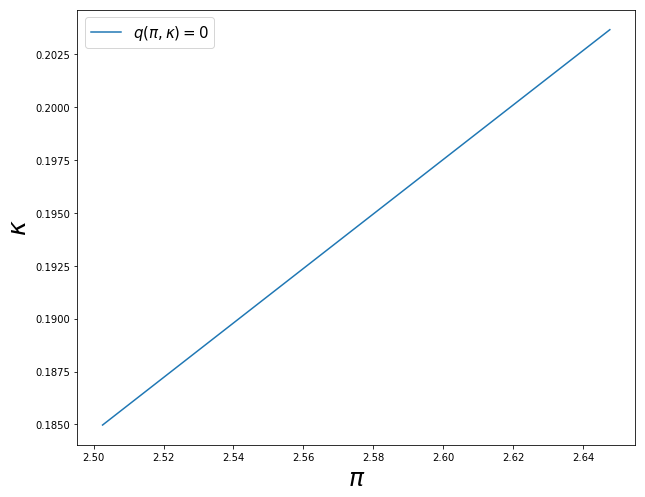

In [192]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl1[500:530], k_lvl1[500:530], label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

In [131]:
(k_lvl1[-1]-k_lvl1[0])/(p_lvl1[-1]-p_lvl1[0])

0.30628761082965184

In [132]:
(k_lvl1[1]-k_lvl1[0])/(p_lvl1[1]-p_lvl1[0])

0.3107548558018028

## Caso 2:
---
Integramos en el intervalo $(-\infty, 0)$ para valores de $\pi$:
$$\pi \leq 1$$

In [22]:
def kappa_level2(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        #RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [193]:
# Limites de la integral para x<0
lim_inf = -0.5#-10.0
lim_sup = -0.001

p_lvl2, k_lvl2 = kappa_level2(-5.0, 1.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -7.579388747415301
Diferencia f(x+dx) - f(x):  -7.579360524211218
Diferencia f(x+dx) - f(x):  -7.579332290526626
Diferencia f(x+dx) - f(x):  -7.579304046360836
Diferencia f(x+dx) - f(x):  -7.5792757917129165
Diferencia f(x+dx) - f(x):  -7.579247526582126
Diferencia f(x+dx) - f(x):  -7.5792192509675615
Diferencia f(x+dx) - f(x):  -7.579190964868495
Diferencia f(x+dx) - f(x):  -7.579162668283949
Diferencia f(x+dx) - f(x):  -7.579134361213214
Diferencia f(x+dx) - f(x):  -7.579106043655379
Diferencia f(x+dx) - f(x):  -7.579077715609699
Diferencia f(x+dx) - f(x):  -7.579049377075293
Diferencia f(x+dx) - f(x):  -7.579021028051294
Diferencia f(x+dx) - f(x):  -7.5789926685369515
Diferencia f(x+dx) - f(x):  -7.578964298531389
Diferencia f(x+dx) - f(x):  -7.578935918033789
Diferencia f(x+dx) - f(x):  -7.578907527043288
Diferencia f(x+dx) - f(x):  -7.578879125559112
Diferencia f(x+dx) - f(x):  -7.578850713580355
Diferencia f(x+dx) - f(x):  -7.578822291106295
Diferencia

Diferencia f(x+dx) - f(x):  -7.5742893916454435
Diferencia f(x+dx) - f(x):  -7.5742593216847744
Diferencia f(x+dx) - f(x):  -7.574229241097644
Diferencia f(x+dx) - f(x):  -7.574199149883185
Diferencia f(x+dx) - f(x):  -7.574169048040506
Diferencia f(x+dx) - f(x):  -7.5741389355688575
Diferencia f(x+dx) - f(x):  -7.574108812467305
Diferencia f(x+dx) - f(x):  -7.574078678735123
Diferencia f(x+dx) - f(x):  -7.574048534371343
Diferencia f(x+dx) - f(x):  -7.574018379375222
Diferencia f(x+dx) - f(x):  -7.573988213745842
Diferencia f(x+dx) - f(x):  -7.573958037482445
Diferencia f(x+dx) - f(x):  -7.573927850584148
Diferencia f(x+dx) - f(x):  -7.573897653050068
Diferencia f(x+dx) - f(x):  -7.5738674448795
Diferencia f(x+dx) - f(x):  -7.573837226071422
Diferencia f(x+dx) - f(x):  -7.573806996625141
Diferencia f(x+dx) - f(x):  -7.573776756539694
Diferencia f(x+dx) - f(x):  -7.573746505814359
Diferencia f(x+dx) - f(x):  -7.573716244448203
Diferencia f(x+dx) - f(x):  -7.573685972440462
Diferencia f

Diferencia f(x+dx) - f(x):  -7.568768760927448
Diferencia f(x+dx) - f(x):  -7.5687367861663795
Diferencia f(x+dx) - f(x):  -7.568704800628446
Diferencia f(x+dx) - f(x):  -7.568672804312701
Diferencia f(x+dx) - f(x):  -7.568640797218432
Diferencia f(x+dx) - f(x):  -7.568608779344618
Diferencia f(x+dx) - f(x):  -7.568576750690543
Diferencia f(x+dx) - f(x):  -7.568544711255257
Diferencia f(x+dx) - f(x):  -7.568512661038007
Diferencia f(x+dx) - f(x):  -7.5684806000378515
Diferencia f(x+dx) - f(x):  -7.568448528254024
Diferencia f(x+dx) - f(x):  -7.5684164456856635
Diferencia f(x+dx) - f(x):  -7.568384352331819
Diferencia f(x+dx) - f(x):  -7.568352248191751
Diferencia f(x+dx) - f(x):  -7.568320133264514
Diferencia f(x+dx) - f(x):  -7.568288007549356
Diferencia f(x+dx) - f(x):  -7.568255871045324
Diferencia f(x+dx) - f(x):  -7.568223723751686
Diferencia f(x+dx) - f(x):  -7.5681915656675045
Diferencia f(x+dx) - f(x):  -7.56815939679197
Diferencia f(x+dx) - f(x):  -7.5681272171242
Diferencia f

Diferencia f(x+dx) - f(x):  -7.5628049443154275
Diferencia f(x+dx) - f(x):  -7.562771005025084
Diferencia f(x+dx) - f(x):  -7.562737054803023
Diferencia f(x+dx) - f(x):  -7.562703093648263
Diferencia f(x+dx) - f(x):  -7.562669121560056
Diferencia f(x+dx) - f(x):  -7.56263513853753
Diferencia f(x+dx) - f(x):  -7.562601144579691
Diferencia f(x+dx) - f(x):  -7.5625671396858145
Diferencia f(x+dx) - f(x):  -7.562533123854969
Diferencia f(x+dx) - f(x):  -7.5624990970863415
Diferencia f(x+dx) - f(x):  -7.562465059379015
Diferencia f(x+dx) - f(x):  -7.562431010732201
Diferencia f(x+dx) - f(x):  -7.562396951144997
Diferencia f(x+dx) - f(x):  -7.562362880616547
Diferencia f(x+dx) - f(x):  -7.56232879914592
Diferencia f(x+dx) - f(x):  -7.562294706732384
Diferencia f(x+dx) - f(x):  -7.562260603375012
Diferencia f(x+dx) - f(x):  -7.562226489072895
Diferencia f(x+dx) - f(x):  -7.562192363825261
Diferencia f(x+dx) - f(x):  -7.562158227631187
Diferencia f(x+dx) - f(x):  -7.562124080489848
Diferencia f

Diferencia f(x+dx) - f(x):  -7.556554845424159
Diferencia f(x+dx) - f(x):  -7.5565189355722175
Diferencia f(x+dx) - f(x):  -7.556483014633464
Diferencia f(x+dx) - f(x):  -7.5564470826069865
Diferencia f(x+dx) - f(x):  -7.55641113949185
Diferencia f(x+dx) - f(x):  -7.556375185287294
Diferencia f(x+dx) - f(x):  -7.556339219992346
Diferencia f(x+dx) - f(x):  -7.5563032436062585
Diferencia f(x+dx) - f(x):  -7.556267256127992
Diferencia f(x+dx) - f(x):  -7.556231257556799
Diferencia f(x+dx) - f(x):  -7.55619524789174
Diferencia f(x+dx) - f(x):  -7.556159227132021
Diferencia f(x+dx) - f(x):  -7.556123195276708
Diferencia f(x+dx) - f(x):  -7.556087152324903
Diferencia f(x+dx) - f(x):  -7.556051098275862
Diferencia f(x+dx) - f(x):  -7.5560150331285385
Diferencia f(x+dx) - f(x):  -7.5559789568821785
Diferencia f(x+dx) - f(x):  -7.5559428695358335
Diferencia f(x+dx) - f(x):  -7.555906771088729
Diferencia f(x+dx) - f(x):  -7.555870661539885
Diferencia f(x+dx) - f(x):  -7.555834540888533
Diferenci

Diferencia f(x+dx) - f(x):  -7.550101056180406
Diferencia f(x+dx) - f(x):  -7.550063192801325
Diferencia f(x+dx) - f(x):  -7.550025318181927
Diferencia f(x+dx) - f(x):  -7.549987432321309
Diferencia f(x+dx) - f(x):  -7.54994953521852
Diferencia f(x+dx) - f(x):  -7.549911626872774
Diferencia f(x+dx) - f(x):  -7.549873707283105
Diferencia f(x+dx) - f(x):  -7.549835776448749
Diferencia f(x+dx) - f(x):  -7.549797834368661
Diferencia f(x+dx) - f(x):  -7.549759881042089
Diferencia f(x+dx) - f(x):  -7.549721916468062
Diferencia f(x+dx) - f(x):  -7.549683940645778
Diferencia f(x+dx) - f(x):  -7.549645953574267
Diferencia f(x+dx) - f(x):  -7.549607955252732
Diferencia f(x+dx) - f(x):  -7.549569945680293
Diferencia f(x+dx) - f(x):  -7.549531924855938
Diferencia f(x+dx) - f(x):  -7.549493892778912
Diferencia f(x+dx) - f(x):  -7.54945584944825
Diferencia f(x+dx) - f(x):  -7.549417794863153
Diferencia f(x+dx) - f(x):  -7.549379729022636
Diferencia f(x+dx) - f(x):  -7.5493416519259355
Diferencia f(x

Diferencia f(x+dx) - f(x):  -7.54314360925115
Diferencia f(x+dx) - f(x):  -7.543103719732258
Diferencia f(x+dx) - f(x):  -7.5430638188140335
Diferencia f(x+dx) - f(x):  -7.543023906495687
Diferencia f(x+dx) - f(x):  -7.542983982776178
Diferencia f(x+dx) - f(x):  -7.542944047654725
Diferencia f(x+dx) - f(x):  -7.542904101130365
Diferencia f(x+dx) - f(x):  -7.5428641432022765
Diferencia f(x+dx) - f(x):  -7.542824173869491
Diferencia f(x+dx) - f(x):  -7.542784193131187
Diferencia f(x+dx) - f(x):  -7.542744200986434
Diferencia f(x+dx) - f(x):  -7.542704197434343
Diferencia f(x+dx) - f(x):  -7.542664182474027
Diferencia f(x+dx) - f(x):  -7.542624156104523
Diferencia f(x+dx) - f(x):  -7.542584118325042
Diferencia f(x+dx) - f(x):  -7.542544069134596
Diferencia f(x+dx) - f(x):  -7.542504008532372
Diferencia f(x+dx) - f(x):  -7.542463936517446
Diferencia f(x+dx) - f(x):  -7.542423853088923
Diferencia f(x+dx) - f(x):  -7.542383758245855
Diferencia f(x+dx) - f(x):  -7.542343651987441
Diferencia f

Diferencia f(x+dx) - f(x):  -7.535778996431247
Diferencia f(x+dx) - f(x):  -7.5357370405843405
Diferencia f(x+dx) - f(x):  -7.535695073176331
Diferencia f(x+dx) - f(x):  -7.535653094206257
Diferencia f(x+dx) - f(x):  -7.535611103673254
Diferencia f(x+dx) - f(x):  -7.535569101576403
Diferencia f(x+dx) - f(x):  -7.535527087914794
Diferencia f(x+dx) - f(x):  -7.535485062687545
Diferencia f(x+dx) - f(x):  -7.5354430258936596
Diferencia f(x+dx) - f(x):  -7.535400977532365
Diferencia f(x+dx) - f(x):  -7.535358917602629
Diferencia f(x+dx) - f(x):  -7.535316846103672
Diferencia f(x+dx) - f(x):  -7.535274763034501
Diferencia f(x+dx) - f(x):  -7.535232668394265
Diferencia f(x+dx) - f(x):  -7.53519056218197
Diferencia f(x+dx) - f(x):  -7.535148444396814
Diferencia f(x+dx) - f(x):  -7.535106315037805
Diferencia f(x+dx) - f(x):  -7.535064174104125
Diferencia f(x+dx) - f(x):  -7.535022021594838
Diferencia f(x+dx) - f(x):  -7.534979857508997
Diferencia f(x+dx) - f(x):  -7.53493768184574
Diferencia f(

Diferencia f(x+dx) - f(x):  -7.520335846684876
Diferencia f(x+dx) - f(x):  -7.5202897768507455
Diferencia f(x+dx) - f(x):  -7.520243695133967
Diferencia f(x+dx) - f(x):  -7.520197601533734
Diferencia f(x+dx) - f(x):  -7.520151496048964
Diferencia f(x+dx) - f(x):  -7.520105378678835
Diferencia f(x+dx) - f(x):  -7.520059249422346
Diferencia f(x+dx) - f(x):  -7.520013108278668
Diferencia f(x+dx) - f(x):  -7.519966955246808
Diferencia f(x+dx) - f(x):  -7.519920790325816
Diferencia f(x+dx) - f(x):  -7.519874613514883
Diferencia f(x+dx) - f(x):  -7.519828424812896
Diferencia f(x+dx) - f(x):  -7.519782224219089
Diferencia f(x+dx) - f(x):  -7.519736011732409
Diferencia f(x+dx) - f(x):  -7.519689787352046
Diferencia f(x+dx) - f(x):  -7.519643551076982
Diferencia f(x+dx) - f(x):  -7.519597302906348
Diferencia f(x+dx) - f(x):  -7.519551042839204
Diferencia f(x+dx) - f(x):  -7.519504770874605
Diferencia f(x+dx) - f(x):  -7.5194584870116365
Diferencia f(x+dx) - f(x):  -7.519412191249316
Diferencia 

Diferencia f(x+dx) - f(x):  -7.503378482422335
Diferencia f(x+dx) - f(x):  -7.503328172169162
Diferencia f(x+dx) - f(x):  -7.503277849703036
Diferencia f(x+dx) - f(x):  -7.503227515022999
Diferencia f(x+dx) - f(x):  -7.503177168128076
Diferencia f(x+dx) - f(x):  -7.503126809017321
Diferencia f(x+dx) - f(x):  -7.5030764376898205
Diferencia f(x+dx) - f(x):  -7.503026054144581
Diferencia f(x+dx) - f(x):  -7.502975658380684
Diferencia f(x+dx) - f(x):  -7.502925250397176
Diferencia f(x+dx) - f(x):  -7.502874830193086
Diferencia f(x+dx) - f(x):  -7.502824397767462
Diferencia f(x+dx) - f(x):  -7.50277395311938
Diferencia f(x+dx) - f(x):  -7.50272349624791
Diferencia f(x+dx) - f(x):  -7.502673027152031
Diferencia f(x+dx) - f(x):  -7.502622545830818
Diferencia f(x+dx) - f(x):  -7.502572052283359
Diferencia f(x+dx) - f(x):  -7.502521546508653
Diferencia f(x+dx) - f(x):  -7.5024710285057665
Diferencia f(x+dx) - f(x):  -7.502420498273761
Diferencia f(x+dx) - f(x):  -7.502369955811677
Diferencia f(

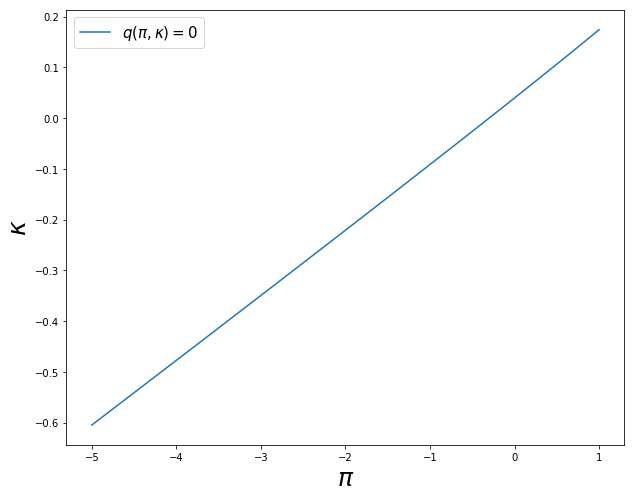

In [194]:
plt.figure(figsize=(10, 8))
#plt.plot(p_lvl2[800:1000], k_lvl2[800:1000], label=r"$q(\pi, \kappa)=0$")
plt.plot(p_lvl2, k_lvl2, label=r"$q(\pi, \kappa)=0$")

plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

In [152]:
k_lvl2[1997:2000]

array([0.3686511 , 0.36959373, 0.37053643])

## Caso 3
---
Integramos en el intervalo $(-\infty, +\infty)$ para valores de $\pi$:
$$\pi \in [0, 1]$$
**Como cambia el intervalo de integración, debemos redefinir la función** `kappa_level()`


In [25]:
def kappa_level3(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint  = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        RKint += RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch  = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [195]:
# Limites de la integral para x<0
lim_inf = -0.5
lim_sup = -0.001#-2.401
# Limites de la integral para x>0
Lim_inf = 0.001
Lim_sup = 0.5

p_lvl3, k_lvl3 = kappa_level3(0.0, 1.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -7.517183795032768
Diferencia f(x+dx) - f(x):  -5.379410297880473e-07
Diferencia f(x+dx) - f(x):  -7.517175982866327
Diferencia f(x+dx) - f(x):  -5.37036002251031e-07
Diferencia f(x+dx) - f(x):  -7.51716817036807
Diferencia f(x+dx) - f(x):  -5.361327085867782e-07
Diferencia f(x+dx) - f(x):  -7.51716035753801
Diferencia f(x+dx) - f(x):  -5.352311451252442e-07
Diferencia f(x+dx) - f(x):  -7.517152544376131
Diferencia f(x+dx) - f(x):  -5.343313082048479e-07
Diferencia f(x+dx) - f(x):  -7.51714473088246
Diferencia f(x+dx) - f(x):  -5.334331941720516e-07
Diferencia f(x+dx) - f(x):  -7.517136917056941
Diferencia f(x+dx) - f(x):  -5.325367993817541e-07
Diferencia f(x+dx) - f(x):  -7.517129102899624
Diferencia f(x+dx) - f(x):  -5.316421201970262e-07
Diferencia f(x+dx) - f(x):  -7.5171212884104825
Diferencia f(x+dx) - f(x):  -5.30749152989328e-07
Diferencia f(x+dx) - f(x):  -7.5171134735894825
Diferencia f(x+dx) - f(x):  -5.298578941381627e-07
Diferencia f(x+dx) - f(

Diferencia f(x+dx) - f(x):  -7.516518575925762
Diferencia f(x+dx) - f(x):  -4.66857336001683e-07
Diferencia f(x+dx) - f(x):  -7.516510735540738
Diferencia f(x+dx) - f(x):  -4.660873686448017e-07
Diferencia f(x+dx) - f(x):  -7.516502894823571
Diferencia f(x+dx) - f(x):  -4.6531885105069524e-07
Diferencia f(x+dx) - f(x):  -7.5164950537742286
Diferencia f(x+dx) - f(x):  -4.64551780190821e-07
Diferencia f(x+dx) - f(x):  -7.516487212392715
Diferencia f(x+dx) - f(x):  -4.6378615304346695e-07
Diferencia f(x+dx) - f(x):  -7.516479370678972
Diferencia f(x+dx) - f(x):  -4.6302196659369716e-07
Diferencia f(x+dx) - f(x):  -7.51647152863308
Diferencia f(x+dx) - f(x):  -4.622592178335147e-07
Diferencia f(x+dx) - f(x):  -7.516463686255001
Diferencia f(x+dx) - f(x):  -4.6149790376142106e-07
Diferencia f(x+dx) - f(x):  -7.516455843544719
Diferencia f(x+dx) - f(x):  -4.607380213828905e-07
Diferencia f(x+dx) - f(x):  -7.516448000502248
Diferencia f(x+dx) - f(x):  -4.599795677100448e-07
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -4.069580569083183e-07
Diferencia f(x+dx) - f(x):  -7.515850956931654
Diferencia f(x+dx) - f(x):  -4.062999320806257e-07
Diferencia f(x+dx) - f(x):  -7.515843088296911
Diferencia f(x+dx) - f(x):  -4.056430249332882e-07
Diferencia f(x+dx) - f(x):  -7.515835219329631
Diferencia f(x+dx) - f(x):  -4.049873329582413e-07
Diferencia f(x+dx) - f(x):  -7.515827350029806
Diferencia f(x+dx) - f(x):  -4.0433285365287536e-07
Diferencia f(x+dx) - f(x):  -7.515819480397418
Diferencia f(x+dx) - f(x):  -4.0367958452032016e-07
Diferencia f(x+dx) - f(x):  -7.515811610432511
Diferencia f(x+dx) - f(x):  -4.0302752306922143e-07
Diferencia f(x+dx) - f(x):  -7.515803740135016
Diferencia f(x+dx) - f(x):  -4.023766668137882e-07
Diferencia f(x+dx) - f(x):  -7.515795869504977
Diferencia f(x+dx) - f(x):  -4.01727013273786e-07
Diferencia f(x+dx) - f(x):  -7.515787998542393
Diferencia f(x+dx) - f(x):  -4.010785599745505e-07
Diferencia f(x+dx) - f(x):  -7.51578012724724
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -3.551277593437664e-07
Diferencia f(x+dx) - f(x):  -7.515180935398451
Diferencia f(x+dx) - f(x):  -3.545647108407963e-07
Diferencia f(x+dx) - f(x):  -7.515173038482729
Diferencia f(x+dx) - f(x):  -3.5400268558220875e-07
Diferencia f(x+dx) - f(x):  -7.515165141234121
Diferencia f(x+dx) - f(x):  -3.5344168149188535e-07
Diferencia f(x+dx) - f(x):  -7.515157243652585
Diferencia f(x+dx) - f(x):  -3.528816964982681e-07
Diferencia f(x+dx) - f(x):  -7.515149345738152
Diferencia f(x+dx) - f(x):  -3.5232272853453567e-07
Diferencia f(x+dx) - f(x):  -7.515141447490812
Diferencia f(x+dx) - f(x):  -3.5176477553817634e-07
Diferencia f(x+dx) - f(x):  -7.515133548910523
Diferencia f(x+dx) - f(x):  -3.512078354514083e-07
Diferencia f(x+dx) - f(x):  -7.515125649997337
Diferencia f(x+dx) - f(x):  -3.506519062209491e-07
Diferencia f(x+dx) - f(x):  -7.515117750751191
Diferencia f(x+dx) - f(x):  -3.5009698579807e-07
Diferencia f(x+dx) - f(x):  -7.515109851172149
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -7.514516433566072
Diferencia f(x+dx) - f(x):  -3.107255090333455e-07
Diferencia f(x+dx) - f(x):  -7.5145085086714225
Diferencia f(x+dx) - f(x):  -3.102424567725295e-07
Diferencia f(x+dx) - f(x):  -7.514500583443514
Diferencia f(x+dx) - f(x):  -3.0976026665371255e-07
Diferencia f(x+dx) - f(x):  -7.514492657882311
Diferencia f(x+dx) - f(x):  -3.092789369548259e-07
Diferencia f(x+dx) - f(x):  -7.514484731987832
Diferencia f(x+dx) - f(x):  -3.087984659575277e-07
Diferencia f(x+dx) - f(x):  -7.51447680576009
Diferencia f(x+dx) - f(x):  -3.0831885194725723e-07
Diferencia f(x+dx) - f(x):  -7.514468879199043
Diferencia f(x+dx) - f(x):  -3.078400932131943e-07
Diferencia f(x+dx) - f(x):  -7.514460952304741
Diferencia f(x+dx) - f(x):  -3.0736218804827947e-07
Diferencia f(x+dx) - f(x):  -7.514453025077138
Diferencia f(x+dx) - f(x):  -3.068851347490787e-07
Diferencia f(x+dx) - f(x):  -7.514445097516234
Diferencia f(x+dx) - f(x):  -3.064089316159696e-07
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -2.7341447845143384e-07
Diferencia f(x+dx) - f(x):  -7.513849580235206
Diferencia f(x+dx) - f(x):  -2.729974537811818e-07
Diferencia f(x+dx) - f(x):  -7.513841627331082
Diferencia f(x+dx) - f(x):  -2.725811603509156e-07
Diferencia f(x+dx) - f(x):  -7.513833674093306
Diferencia f(x+dx) - f(x):  -2.7216559672274933e-07
Diferencia f(x+dx) - f(x):  -7.51382572052189
Diferencia f(x+dx) - f(x):  -2.7175076146189394e-07
Diferencia f(x+dx) - f(x):  -7.513817766616853
Diferencia f(x+dx) - f(x):  -2.713366531366909e-07
Diferencia f(x+dx) - f(x):  -7.513809812378181
Diferencia f(x+dx) - f(x):  -2.7092327031846e-07
Diferencia f(x+dx) - f(x):  -7.5138018578058094
Diferencia f(x+dx) - f(x):  -2.705106115816921e-07
Diferencia f(x+dx) - f(x):  -7.513793902899824
Diferencia f(x+dx) - f(x):  -2.7009867550401904e-07
Diferencia f(x+dx) - f(x):  -7.513785947660182
Diferencia f(x+dx) - f(x):  -2.696874606659288e-07
Diferencia f(x+dx) - f(x):  -7.513777992086897
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -2.4008222933649003e-07
Diferencia f(x+dx) - f(x):  -7.513164410616394
Diferencia f(x+dx) - f(x):  -2.397231385602313e-07
Diferencia f(x+dx) - f(x):  -7.513156429004187
Diferencia f(x+dx) - f(x):  -2.393646660020652e-07
Diferencia f(x+dx) - f(x):  -7.5131484470579935
Diferencia f(x+dx) - f(x):  -2.3900681046619814e-07
Diferencia f(x+dx) - f(x):  -7.513140464777802
Diferencia f(x+dx) - f(x):  -2.3864957075953334e-07
Diferencia f(x+dx) - f(x):  -7.513132482163574
Diferencia f(x+dx) - f(x):  -2.3829294569141355e-07
Diferencia f(x+dx) - f(x):  -7.513124499215337
Diferencia f(x+dx) - f(x):  -2.3793693407377003e-07
Diferencia f(x+dx) - f(x):  -7.513116515933074
Diferencia f(x+dx) - f(x):  -2.3758153472098703e-07
Diferencia f(x+dx) - f(x):  -7.513108532316789
Diferencia f(x+dx) - f(x):  -2.3722674645003397e-07
Diferencia f(x+dx) - f(x):  -7.513100548366474
Diferencia f(x+dx) - f(x):  -2.3687256808039425e-07
Diferencia f(x+dx) - f(x):  -7.513092564082143
Diferencia 

Diferencia f(x+dx) - f(x):  -2.1227613817979387e-07
Diferencia f(x+dx) - f(x):  -7.512500799792381
Diferencia f(x+dx) - f(x):  -2.1196451390090865e-07
Diferencia f(x+dx) - f(x):  -7.512492790443151
Diferencia f(x+dx) - f(x):  -2.1165341674155323e-07
Diferencia f(x+dx) - f(x):  -7.51248478075955
Diferencia f(x+dx) - f(x):  -2.113428456985526e-07
Diferencia f(x+dx) - f(x):  -7.512476770741571
Diferencia f(x+dx) - f(x):  -2.1103279977077822e-07
Diferencia f(x+dx) - f(x):  -7.512468760389247
Diferencia f(x+dx) - f(x):  -2.1072327795926312e-07
Diferencia f(x+dx) - f(x):  -7.512460749702527
Diferencia f(x+dx) - f(x):  -2.1041427926711052e-07
Diferencia f(x+dx) - f(x):  -7.512452738681446
Diferencia f(x+dx) - f(x):  -2.1010580269952765e-07
Diferencia f(x+dx) - f(x):  -7.512444727325978
Diferencia f(x+dx) - f(x):  -2.0979784726379868e-07
Diferencia f(x+dx) - f(x):  -7.51243671563612
Diferencia f(x+dx) - f(x):  -2.094904119692847e-07
Diferencia f(x+dx) - f(x):  -7.512428703611853
Diferencia f(x

Diferencia f(x+dx) - f(x):  -7.511826848452291
Diferencia f(x+dx) - f(x):  -1.875749157387443e-07
Diferencia f(x+dx) - f(x):  -7.511818811001401
Diferencia f(x+dx) - f(x):  -1.873047138020152e-07
Diferencia f(x+dx) - f(x):  -7.511810773215771
Diferencia f(x+dx) - f(x):  -1.870349607780301e-07
Diferencia f(x+dx) - f(x):  -7.5118027350954115
Diferencia f(x+dx) - f(x):  -1.8676565582651536e-07
Diferencia f(x+dx) - f(x):  -7.511794696640322
Diferencia f(x+dx) - f(x):  -1.864967981089355e-07
Diferencia f(x+dx) - f(x):  -7.51178665785045
Diferencia f(x+dx) - f(x):  -1.8622838678855746e-07
Diferencia f(x+dx) - f(x):  -7.511778618725874
Diferencia f(x+dx) - f(x):  -1.8596042103027116e-07
Diferencia f(x+dx) - f(x):  -7.511770579266557
Diferencia f(x+dx) - f(x):  -1.85692900000752e-07
Diferencia f(x+dx) - f(x):  -7.511762539472485
Diferencia f(x+dx) - f(x):  -1.8542582286839663e-07
Diferencia f(x+dx) - f(x):  -7.511754499343617
Diferencia f(x+dx) - f(x):  -1.8515918880330584e-07
Diferencia f(x+d

Diferencia f(x+dx) - f(x):  -7.5111586005478905
Diferencia f(x+dx) - f(x):  -1.6660168380278362e-07
Diferencia f(x+dx) - f(x):  -7.5111505352997625
Diferencia f(x+dx) - f(x):  -1.6636603494013546e-07
Diferencia f(x+dx) - f(x):  -7.511142469716514
Diferencia f(x+dx) - f(x):  -1.661307708189661e-07
Diferencia f(x+dx) - f(x):  -7.511134403798177
Diferencia f(x+dx) - f(x):  -1.6589589073073415e-07
Diferencia f(x+dx) - f(x):  -7.511126337544763
Diferencia f(x+dx) - f(x):  -1.6566139396840428e-07
Diferencia f(x+dx) - f(x):  -7.511118270956242
Diferencia f(x+dx) - f(x):  -1.654272798263015e-07
Diferencia f(x+dx) - f(x):  -7.511110204032608
Diferencia f(x+dx) - f(x):  -1.651935476002534e-07
Diferencia f(x+dx) - f(x):  -7.511102136773879
Diferencia f(x+dx) - f(x):  -1.649601965875022e-07
Diferencia f(x+dx) - f(x):  -7.511094069180029
Diferencia f(x+dx) - f(x):  -1.6472722608672491e-07
Diferencia f(x+dx) - f(x):  -7.511086001251037
Diferencia f(x+dx) - f(x):  -1.644946353980284e-07
Diferencia f(

Diferencia f(x+dx) - f(x):  -1.478778988551712e-07
Diferencia f(x+dx) - f(x):  -7.510463764011373
Diferencia f(x+dx) - f(x):  -1.476725599697989e-07
Diferencia f(x+dx) - f(x):  -7.510455669929637
Diferencia f(x+dx) - f(x):  -1.4746755045464334e-07
Diferencia f(x+dx) - f(x):  -7.510447575512444
Diferencia f(x+dx) - f(x):  -1.4726286971318834e-07
Diferencia f(x+dx) - f(x):  -7.5104394807598
Diferencia f(x+dx) - f(x):  -1.4705851715011035e-07
Diferencia f(x+dx) - f(x):  -7.510431385671669
Diferencia f(x+dx) - f(x):  -1.4685449217130724e-07
Diferencia f(x+dx) - f(x):  -7.510423290248081
Diferencia f(x+dx) - f(x):  -1.4665079418379834e-07
Diferencia f(x+dx) - f(x):  -7.510415194489006
Diferencia f(x+dx) - f(x):  -1.4644742259590235e-07
Diferencia f(x+dx) - f(x):  -7.5104070983944595
Diferencia f(x+dx) - f(x):  -1.4624437681701538e-07
Diferencia f(x+dx) - f(x):  -7.510399001964384
Diferencia f(x+dx) - f(x):  -1.4604165625776512e-07
Diferencia f(x+dx) - f(x):  -7.5103909051988325
Diferencia f

Diferencia f(x+dx) - f(x):  -7.509766446418741
Diferencia f(x+dx) - f(x):  -1.3118493287654578e-07
Diferencia f(x+dx) - f(x):  -7.509758323471253
Diferencia f(x+dx) - f(x):  -1.3100613890686325e-07
Diferencia f(x+dx) - f(x):  -7.509750200187902
Diferencia f(x+dx) - f(x):  -1.308276266242774e-07
Diferencia f(x+dx) - f(x):  -7.509742076568717
Diferencia f(x+dx) - f(x):  -1.3064939552729558e-07
Diferencia f(x+dx) - f(x):  -7.50973395261369
Diferencia f(x+dx) - f(x):  -1.304714451153061e-07
Diferencia f(x+dx) - f(x):  -7.509725828322821
Diferencia f(x+dx) - f(x):  -1.3029377488877972e-07
Diferencia f(x+dx) - f(x):  -7.5097177036960865
Diferencia f(x+dx) - f(x):  -1.3011638434913763e-07
Diferencia f(x+dx) - f(x):  -7.509709578733492
Diferencia f(x+dx) - f(x):  -1.2993927299875472e-07
Diferencia f(x+dx) - f(x):  -7.509701453435042
Diferencia f(x+dx) - f(x):  -1.2976244034103254e-07
Diferencia f(x+dx) - f(x):  -7.509693327800683
Diferencia f(x+dx) - f(x):  -1.2958588588032975e-07
Diferencia f

Diferencia f(x+dx) - f(x):  -7.5090666449990096
Diferencia f(x+dx) - f(x):  -1.1678892135514083e-07
Diferencia f(x+dx) - f(x):  -7.509058493153475
Diferencia f(x+dx) - f(x):  -1.1663261634698071e-07
Diferencia f(x+dx) - f(x):  -7.509050340971747
Diferencia f(x+dx) - f(x):  -1.1647655330556082e-07
Diferencia f(x+dx) - f(x):  -7.50904218845378
Diferencia f(x+dx) - f(x):  -1.163207318072173e-07
Diferencia f(x+dx) - f(x):  -7.509034035599601
Diferencia f(x+dx) - f(x):  -1.1616515142911129e-07
Diferencia f(x+dx) - f(x):  -7.509025882409201
Diferencia f(x+dx) - f(x):  -1.1600981174921032e-07
Diferencia f(x+dx) - f(x):  -7.509017728882586
Diferencia f(x+dx) - f(x):  -1.1585471234634252e-07
Diferencia f(x+dx) - f(x):  -7.509009575019732
Diferencia f(x+dx) - f(x):  -1.15699852800078e-07
Diferencia f(x+dx) - f(x):  -7.509001420820617
Diferencia f(x+dx) - f(x):  -1.1554523269089996e-07
Diferencia f(x+dx) - f(x):  -7.50899326628528
Diferencia f(x+dx) - f(x):  -1.1539085160002686e-07
Diferencia f(x

Diferencia f(x+dx) - f(x):  -7.508364356978266
Diferencia f(x+dx) - f(x):  -1.0418941142547271e-07
Diferencia f(x+dx) - f(x):  -7.5083561762024615
Diferencia f(x+dx) - f(x):  -1.0405244778789434e-07
Diferencia f(x+dx) - f(x):  -7.508347995090048
Diferencia f(x+dx) - f(x):  -1.0391569252202358e-07
Diferencia f(x+dx) - f(x):  -7.508339813641047
Diferencia f(x+dx) - f(x):  -1.0377914526904203e-07
Diferencia f(x+dx) - f(x):  -7.508331631855469
Diferencia f(x+dx) - f(x):  -1.0364280567082077e-07
Diferencia f(x+dx) - f(x):  -7.508323449733286
Diferencia f(x+dx) - f(x):  -1.0350667336988648e-07
Diferencia f(x+dx) - f(x):  -7.508315267274472
Diferencia f(x+dx) - f(x):  -1.0337074800949939e-07
Diferencia f(x+dx) - f(x):  -7.508307084479078
Diferencia f(x+dx) - f(x):  -1.0323502923357191e-07
Diferencia f(x+dx) - f(x):  -7.5082989013470645
Diferencia f(x+dx) - f(x):  -1.0309951668670936e-07
Diferencia f(x+dx) - f(x):  -7.508290717878413
Diferencia f(x+dx) - f(x):  -1.0296421001417604e-07
Diferenc

Diferencia f(x+dx) - f(x):  -9.313682564749239e-08
Diferencia f(x+dx) - f(x):  -7.507651369841554
Diferencia f(x+dx) - f(x):  -9.301653784475015e-08
Diferencia f(x+dx) - f(x):  -7.507643159766193
Diferencia f(x+dx) - f(x):  -9.289642992535645e-08
Diferencia f(x+dx) - f(x):  -7.507634949353861
Diferencia f(x+dx) - f(x):  -9.277650158463355e-08
Diferencia f(x+dx) - f(x):  -7.507626738604518
Diferencia f(x+dx) - f(x):  -9.265675251845087e-08
Diferencia f(x+dx) - f(x):  -7.507618527518247
Diferencia f(x+dx) - f(x):  -9.253718242328603e-08
Diferencia f(x+dx) - f(x):  -7.507610316094979
Diferencia f(x+dx) - f(x):  -9.241779099616549e-08
Diferencia f(x+dx) - f(x):  -7.5076021043347225
Diferencia f(x+dx) - f(x):  -9.22985779346968e-08
Diferencia f(x+dx) - f(x):  -7.507593892237484
Diferencia f(x+dx) - f(x):  -9.217954293705333e-08
Diferencia f(x+dx) - f(x):  -7.507585679803249
Diferencia f(x+dx) - f(x):  -9.206068570197934e-08
Diferencia f(x+dx) - f(x):  -7.507577467031993
Diferencia f(x+dx) -

Diferencia f(x+dx) - f(x):  -7.506944071291386
Diferencia f(x+dx) - f(x):  -8.331367107637341e-08
Diferencia f(x+dx) - f(x):  -7.506935832220705
Diferencia f(x+dx) - f(x):  -8.320795162335616e-08
Diferencia f(x+dx) - f(x):  -7.506927592812694
Diferencia f(x+dx) - f(x):  -8.310238757441494e-08
Diferencia f(x+dx) - f(x):  -7.506919353067307
Diferencia f(x+dx) - f(x):  -8.299697867064822e-08
Diferencia f(x+dx) - f(x):  -7.506911112984586
Diferencia f(x+dx) - f(x):  -8.289172465364318e-08
Diferencia f(x+dx) - f(x):  -7.506902872564524
Diferencia f(x+dx) - f(x):  -8.278662526547405e-08
Diferencia f(x+dx) - f(x):  -7.506894631807086
Diferencia f(x+dx) - f(x):  -8.268168024867755e-08
Diferencia f(x+dx) - f(x):  -7.506886390712289
Diferencia f(x+dx) - f(x):  -8.257688934628081e-08
Diferencia f(x+dx) - f(x):  -7.506878149280109
Diferencia f(x+dx) - f(x):  -8.247225230178279e-08
Diferencia f(x+dx) - f(x):  -7.506869907510556
Diferencia f(x+dx) - f(x):  -8.236776885916354e-08
Diferencia f(x+dx) -

Diferencia f(x+dx) - f(x):  -7.5062508129532866
Diferencia f(x+dx) - f(x):  -7.495120471985068e-08
Diferencia f(x+dx) - f(x):  -7.5062425455303625
Diferencia f(x+dx) - f(x):  -7.485768065359828e-08
Diferencia f(x+dx) - f(x):  -7.506234277769742
Diferencia f(x+dx) - f(x):  -7.476429182968049e-08
Diferencia f(x+dx) - f(x):  -7.506226009671408
Diferencia f(x+dx) - f(x):  -7.467103802633815e-08
Diferencia f(x+dx) - f(x):  -7.506217741235339
Diferencia f(x+dx) - f(x):  -7.457791902222121e-08
Diferencia f(x+dx) - f(x):  -7.506209472461542
Diferencia f(x+dx) - f(x):  -7.448493459637861e-08
Diferencia f(x+dx) - f(x):  -7.506201203350024
Diferencia f(x+dx) - f(x):  -7.43920845282692e-08
Diferencia f(x+dx) - f(x):  -7.506192933900785
Diferencia f(x+dx) - f(x):  -7.429936859775e-08
Diferencia f(x+dx) - f(x):  -7.506184664113778
Diferencia f(x+dx) - f(x):  -7.420678658508199e-08
Diferencia f(x+dx) - f(x):  -7.506176393989055
Diferencia f(x+dx) - f(x):  -7.411433827093024e-08
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -7.50555517174449
Diferencia f(x+dx) - f(x):  -6.754626546366181e-08
Diferencia f(x+dx) - f(x):  -7.505546875938393
Diferencia f(x+dx) - f(x):  -6.746336580229497e-08
Diferencia f(x+dx) - f(x):  -7.505538579794269
Diferencia f(x+dx) - f(x):  -6.738058409406244e-08
Diferencia f(x+dx) - f(x):  -7.505530283312044
Diferencia f(x+dx) - f(x):  -6.729792014858085e-08
Diferencia f(x+dx) - f(x):  -7.505521986491718
Diferencia f(x+dx) - f(x):  -6.72153737757828e-08
Diferencia f(x+dx) - f(x):  -7.505513689333316
Diferencia f(x+dx) - f(x):  -6.713294478598117e-08
Diferencia f(x+dx) - f(x):  -7.50550539183682
Diferencia f(x+dx) - f(x):  -6.705063298979212e-08
Diferencia f(x+dx) - f(x):  -7.505497094002216
Diferencia f(x+dx) - f(x):  -6.696843819820277e-08
Diferencia f(x+dx) - f(x):  -7.505488795829461
Diferencia f(x+dx) - f(x):  -6.688636022252637e-08
Diferencia f(x+dx) - f(x):  -7.5054804973186435
Diferencia f(x+dx) - f(x):  -6.680439887441245e-08
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -6.097637812085678e-08
Diferencia f(x+dx) - f(x):  -7.504848820847183
Diferencia f(x+dx) - f(x):  -6.09027542059791e-08
Diferencia f(x+dx) - f(x):  -7.504840496288587
Diferencia f(x+dx) - f(x):  -6.082923338408197e-08
Diferencia f(x+dx) - f(x):  -7.5048321713915165
Diferencia f(x+dx) - f(x):  -6.075581549132637e-08
Diferencia f(x+dx) - f(x):  -7.504823846155997
Diferencia f(x+dx) - f(x):  -6.06825003641697e-08
Diferencia f(x+dx) - f(x):  -7.504815520582039
Diferencia f(x+dx) - f(x):  -6.060928783935652e-08
Diferencia f(x+dx) - f(x):  -7.504807194669606
Diferencia f(x+dx) - f(x):  -6.05361777539177e-08
Diferencia f(x+dx) - f(x):  -7.504798868418703
Diferencia f(x+dx) - f(x):  -6.046316994518226e-08
Diferencia f(x+dx) - f(x):  -7.504790541829301
Diferencia f(x+dx) - f(x):  -6.039026425075365e-08
Diferencia f(x+dx) - f(x):  -7.504782214901439
Diferencia f(x+dx) - f(x):  -6.031746050853179e-08
Diferencia f(x+dx) - f(x):  -7.504773887635075
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -7.504148377656474
Diferencia f(x+dx) - f(x):  -5.507077536905319e-08
Diferencia f(x+dx) - f(x):  -7.504140024652457
Diferencia f(x+dx) - f(x):  -5.50053570480227e-08
Diferencia f(x+dx) - f(x):  -7.504131671309608
Diferencia f(x+dx) - f(x):  -5.4940028877419444e-08
Diferencia f(x+dx) - f(x):  -7.504123317627926
Diferencia f(x+dx) - f(x):  -5.487479071620482e-08
Diferencia f(x+dx) - f(x):  -7.504114963607435
Diferencia f(x+dx) - f(x):  -5.4809642423558743e-08
Diferencia f(x+dx) - f(x):  -7.5041066092480655
Diferencia f(x+dx) - f(x):  -5.474458385893728e-08
Diferencia f(x+dx) - f(x):  -7.504098254549895
Diferencia f(x+dx) - f(x):  -5.467961488200994e-08
Diferencia f(x+dx) - f(x):  -7.504089899512859
Diferencia f(x+dx) - f(x):  -5.461473535272237e-08
Diferencia f(x+dx) - f(x):  -7.504081544136991
Diferencia f(x+dx) - f(x):  -5.454994513124043e-08
Diferencia f(x+dx) - f(x):  -7.504073188422268
Diferencia f(x+dx) - f(x):  -5.448524407798411e-08
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -4.993531600040566e-08
Diferencia f(x+dx) - f(x):  -7.503445543763579
Diferencia f(x+dx) - f(x):  -4.987692195980498e-08
Diferencia f(x+dx) - f(x):  -7.503437162283134
Diferencia f(x+dx) - f(x):  -4.9818607158962867e-08
Diferencia f(x+dx) - f(x):  -7.503428780463498
Diferencia f(x+dx) - f(x):  -4.976037147573972e-08
Diferencia f(x+dx) - f(x):  -7.503420398304648
Diferencia f(x+dx) - f(x):  -4.9702214788233944e-08
Diferencia f(x+dx) - f(x):  -7.503412015806607
Diferencia f(x+dx) - f(x):  -4.9644136974720975e-08
Diferencia f(x+dx) - f(x):  -7.50340363296937
Diferencia f(x+dx) - f(x):  -4.9586137913722735e-08
Diferencia f(x+dx) - f(x):  -7.5033952497929235
Diferencia f(x+dx) - f(x):  -4.952821748392293e-08
Diferencia f(x+dx) - f(x):  -7.503386866277221
Diferencia f(x+dx) - f(x):  -4.9470375564266154e-08
Diferencia f(x+dx) - f(x):  -7.503378482422335
Diferencia f(x+dx) - f(x):  -4.9412612033863864e-08
Diferencia f(x+dx) - f(x):  -7.503370098228238
Diferencia f(x

Diferencia f(x+dx) - f(x):  -4.5138979045071306e-08
Diferencia f(x+dx) - f(x):  -7.502715085580839
Diferencia f(x+dx) - f(x):  -4.508704340722624e-08
Diferencia f(x+dx) - f(x):  -7.502706674574238
Diferencia f(x+dx) - f(x):  -4.5035177129974254e-08
Diferencia f(x+dx) - f(x):  -7.502698263228069
Diferencia f(x+dx) - f(x):  -4.498338010805711e-08
Diferencia f(x+dx) - f(x):  -7.502689851542314
Diferencia f(x+dx) - f(x):  -4.49316522364101e-08
Diferencia f(x+dx) - f(x):  -7.502681439516952
Diferencia f(x+dx) - f(x):  -4.487999341014811e-08
Diferencia f(x+dx) - f(x):  -7.502673027152031
Diferencia f(x+dx) - f(x):  -4.482840352454992e-08
Diferencia f(x+dx) - f(x):  -7.5026646144474896
Diferencia f(x+dx) - f(x):  -4.4776882475088683e-08
Diferencia f(x+dx) - f(x):  -7.502656201403358
Diferencia f(x+dx) - f(x):  -4.472543015740826e-08
Diferencia f(x+dx) - f(x):  -7.50264778801964
Diferencia f(x+dx) - f(x):  -4.4674046467318084e-08
Diferencia f(x+dx) - f(x):  -7.502639374296322
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -7.501998937302432
Diferencia f(x+dx) - f(x):  -4.091562384940922e-08
Diferencia f(x+dx) - f(x):  -7.501990497416227
Diferencia f(x+dx) - f(x):  -4.086928612307905e-08
Diferencia f(x+dx) - f(x):  -7.501982057190105
Diferencia f(x+dx) - f(x):  -4.08230093256266e-08
Diferencia f(x+dx) - f(x):  -7.501973616624017
Diferencia f(x+dx) - f(x):  -4.077679336597762e-08
Diferencia f(x+dx) - f(x):  -7.501965175717981
Diferencia f(x+dx) - f(x):  -4.0730638153253095e-08
Diferencia f(x+dx) - f(x):  -7.501956734471985
Diferencia f(x+dx) - f(x):  -4.068454359668837e-08
Diferencia f(x+dx) - f(x):  -7.501948292886002
Diferencia f(x+dx) - f(x):  -4.063850960568691e-08
Diferencia f(x+dx) - f(x):  -7.501939850960074
Diferencia f(x+dx) - f(x):  -4.059253608981356e-08
Diferencia f(x+dx) - f(x):  -7.501931408694144
Diferencia f(x+dx) - f(x):  -4.05466229587602e-08
Diferencia f(x+dx) - f(x):  -7.5019229660882445
Diferencia f(x+dx) - f(x):  -4.0500770122394473e-08
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -3.714426953906151e-08
Diferencia f(x+dx) - f(x):  -7.50126339498788
Diferencia f(x+dx) - f(x):  -3.710285388706045e-08
Diferencia f(x+dx) - f(x):  -7.501254925509645
Diferencia f(x+dx) - f(x):  -3.706149186178635e-08
Diferencia f(x+dx) - f(x):  -7.5012464556910885
Diferencia f(x+dx) - f(x):  -3.7020183384288974e-08
Diferencia f(x+dx) - f(x):  -7.501237985532164
Diferencia f(x+dx) - f(x):  -3.6978928375768836e-08
Diferencia f(x+dx) - f(x):  -7.5012295150329145
Diferencia f(x+dx) - f(x):  -3.693772675753573e-08
Diferencia f(x+dx) - f(x):  -7.501221044193329
Diferencia f(x+dx) - f(x):  -3.689657845103752e-08
Diferencia f(x+dx) - f(x):  -7.501212573013387
Diferencia f(x+dx) - f(x):  -3.6855483377858857e-08
Diferencia f(x+dx) - f(x):  -7.501204101493045
Diferencia f(x+dx) - f(x):  -3.6814441459696625e-08
Diferencia f(x+dx) - f(x):  -7.501195629632392
Diferencia f(x+dx) - f(x):  -3.677345261839679e-08
Diferencia f(x+dx) - f(x):  -7.501187157431374
Diferencia f(x+

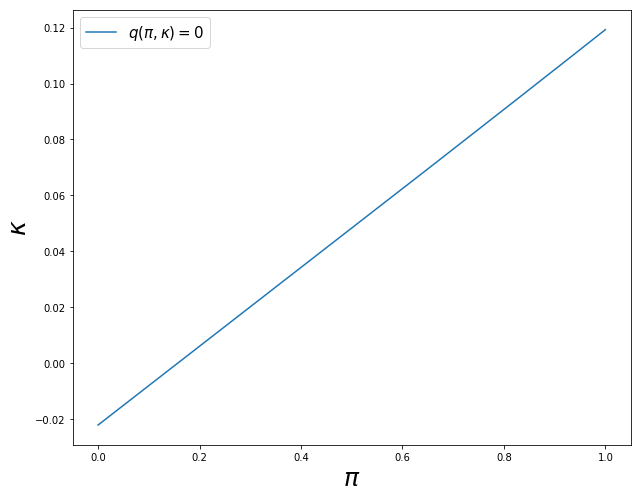

In [196]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl3, k_lvl3, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Segunda curva de nivel:
---
Repetimos el procedimiento, ahora para la función:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

Nuevamente, primero definimos la función dentro del término integral `pi_level_integ()`

In [28]:
def pi_level_integ(xx, y, kapp_par):#, param_dict):
    num = xx*dens_func(xx, y, all_params)#, param_dict)
    den = np.float_power(1-(kapp_par*xx), all_params["eta"])
    return num/den

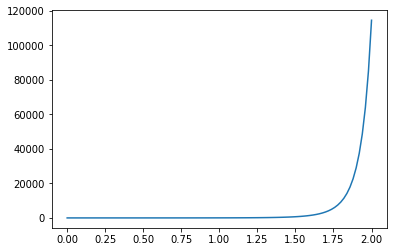

In [52]:
# Visualizacion funcion

x = np.linspace(0, 2, 100)
y = pi_level_integ(x, 0, 0.4)
plt.plot(x, y)
plt.show()

Ahora, calculamos la curva de nivel definiendo `pi_level()` como 

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

iterando valores de kappa según la restricción $\kappa \in [0, 1/c)$

In [30]:
def pi_level(param_dict):
    
    k_it  = np.linspace(0.0, 1./param_dict["c"], 2000)
    pi_it = []
    
    coef = param_dict["lamb"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    num2 = param_dict["c"]*(1.-dist_func(param_dict["c"], y, param_dict))
    ter4 = param_dict["p"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    for i in range(2000):
        #cor1 = NEW_RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, k_it[i], 1.0, param_dict)
        cor1 = RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, 5.0, k_it[i])
        cor2 = num2/(np.float_power(1-(k_it[i]*param_dict["c"]), param_dict["eta"]))
        ter3 = (param_dict["beta"]*k_it[i])/(param_dict["rho"]*param_dict["sig"])
        
        sol = coef*(cor1+cor2)+ter3-ter4
        pi_it.append(sol)
    
    pi_it = np.array(pi_it)
        
    return k_it, pi_it

In [146]:
all_params

{'C': 0.2,
 'M': 50,
 'alph': 0.8,
 'beta': 0.6,
 'c': 2,
 'eta': 5.0,
 'exp_lam': 2,
 'ff': 'Gamma',
 'gam_al': 2,
 'gam_bet': 2,
 'lamb': 3.0,
 'mu': 0.09,
 'p': 0.9,
 'par_al': 2,
 'par_xm': 2,
 'rho': -0.7,
 'sig': 0.3,
 'wei_k': 5,
 'wei_lam': 1}

In [197]:
kl, pil = pi_level(all_params)

Diferencia f(x+dx) - f(x):  0.0003684308299897743
Diferencia f(x+dx) - f(x):  0.0003689828715871535
Diferencia f(x+dx) - f(x):  0.0003695356373235037
Diferencia f(x+dx) - f(x):  0.0003700891281633867
Diferencia f(x+dx) - f(x):  0.0003706433450738067
Diferencia f(x+dx) - f(x):  0.0003711982890222676
Diferencia f(x+dx) - f(x):  0.0003717539609785492
Diferencia f(x+dx) - f(x):  0.0003723103619126533
Diferencia f(x+dx) - f(x):  0.00037286749279691334
Diferencia f(x+dx) - f(x):  0.0003734253546048838
Diferencia f(x+dx) - f(x):  0.0003739839483108409
Diferencia f(x+dx) - f(x):  0.0003745432748913369
Diferencia f(x+dx) - f(x):  0.0003751033353232569
Diferencia f(x+dx) - f(x):  0.0003756641305858732
Diferencia f(x+dx) - f(x):  0.00037622566165951277
Diferencia f(x+dx) - f(x):  0.00037678792952533513
Diferencia f(x+dx) - f(x):  0.00037735093516677587
Diferencia f(x+dx) - f(x):  0.00037791467956777014
Diferencia f(x+dx) - f(x):  0.00037847916371452905
Diferencia f(x+dx) - f(x):  0.00037904438859

Diferencia f(x+dx) - f(x):  0.000472126908860393
Diferencia f(x+dx) - f(x):  0.00047281526741593805
Diferencia f(x+dx) - f(x):  0.0004735045329872234
Diferencia f(x+dx) - f(x):  0.00047419470679893605
Diferencia f(x+dx) - f(x):  0.0004748857900776504
Diferencia f(x+dx) - f(x):  0.00047557778405071804
Diferencia f(x+dx) - f(x):  0.00047627068994837707
Diferencia f(x+dx) - f(x):  0.00047696450900153176
Diferencia f(x+dx) - f(x):  0.00047765924244391744
Diferencia f(x+dx) - f(x):  0.0004783548915099911
Diferencia f(x+dx) - f(x):  0.00047905145743676325
Diferencia f(x+dx) - f(x):  0.00047974894146307623
Diferencia f(x+dx) - f(x):  0.00048044734482860507
Diferencia f(x+dx) - f(x):  0.0004811466687759114
Diferencia f(x+dx) - f(x):  0.00048184691454838946
Diferencia f(x+dx) - f(x):  0.0004825480833920981
Diferencia f(x+dx) - f(x):  0.00048325017655392877
Diferencia f(x+dx) - f(x):  0.0004839531952833265
Diferencia f(x+dx) - f(x):  0.0004846571408315681
Diferencia f(x+dx) - f(x):  0.0004853620

Diferencia f(x+dx) - f(x):  0.0005980780652791173
Diferencia f(x+dx) - f(x):  0.0005989328849177467
Diferencia f(x+dx) - f(x):  0.0005997888378270755
Diferencia f(x+dx) - f(x):  0.0006006459255568641
Diferencia f(x+dx) - f(x):  0.0006015041496601481
Diferencia f(x+dx) - f(x):  0.0006023635116922388
Diferencia f(x+dx) - f(x):  0.0006032240132097244
Diferencia f(x+dx) - f(x):  0.0006040856557727459
Diferencia f(x+dx) - f(x):  0.0006049484409423878
Diferencia f(x+dx) - f(x):  0.0006058123702832319
Diferencia f(x+dx) - f(x):  0.0006066774453608592
Diferencia f(x+dx) - f(x):  0.0006075436677442925
Diferencia f(x+dx) - f(x):  0.0006084110390048858
Diferencia f(x+dx) - f(x):  0.000609279560714604
Diferencia f(x+dx) - f(x):  0.0006101492344499637
Diferencia f(x+dx) - f(x):  0.0006110200617878148
Diferencia f(x+dx) - f(x):  0.0006118920443090037
Diferencia f(x+dx) - f(x):  0.0006127651835948766
Diferencia f(x+dx) - f(x):  0.0006136394812304435
Diferencia f(x+dx) - f(x):  0.0006145149388031568
D

Diferencia f(x+dx) - f(x):  0.000755666792102816
Diferencia f(x+dx) - f(x):  0.00075673134445986
Diferencia f(x+dx) - f(x):  0.0007577973191374987
Diferencia f(x+dx) - f(x):  0.0007588647181090424
Diferencia f(x+dx) - f(x):  0.0007599335433515764
Diferencia f(x+dx) - f(x):  0.0007610037968454053
Diferencia f(x+dx) - f(x):  0.0007620754805726104
Diferencia f(x+dx) - f(x):  0.0007631485965193807
Diferencia f(x+dx) - f(x):  0.0007642231466740146
Diferencia f(x+dx) - f(x):  0.0007652991330284742
Diferencia f(x+dx) - f(x):  0.000766376557576498
Diferencia f(x+dx) - f(x):  0.0007674554223162655
Diferencia f(x+dx) - f(x):  0.0007685357292480655
Diferencia f(x+dx) - f(x):  0.0007696174803749622
Diferencia f(x+dx) - f(x):  0.0007707006777033509
Diferencia f(x+dx) - f(x):  0.0007717853232431793
Diferencia f(x+dx) - f(x):  0.0007728714190061714
Diferencia f(x+dx) - f(x):  0.00077395896700716
Diferencia f(x+dx) - f(x):  0.0007750479692647527
Diferencia f(x+dx) - f(x):  0.0007761384278007766
Difere

Diferencia f(x+dx) - f(x):  0.0009601008535993216
Diferencia f(x+dx) - f(x):  0.0009614398712076699
Diferencia f(x+dx) - f(x):  0.0009627806951514328
Diferencia f(x+dx) - f(x):  0.0009641233279783501
Diferencia f(x+dx) - f(x):  0.000965467772238493
Diferencia f(x+dx) - f(x):  0.0009668140304865958
Diferencia f(x+dx) - f(x):  0.0009681621052813894
Diferencia f(x+dx) - f(x):  0.0009695119991842693
Diferencia f(x+dx) - f(x):  0.0009708637147621824
Diferencia f(x+dx) - f(x):  0.0009722172545841845
Diferencia f(x+dx) - f(x):  0.0009735726212244389
Diferencia f(x+dx) - f(x):  0.0009749298172612164
Diferencia f(x+dx) - f(x):  0.0009762888452752305
Diferencia f(x+dx) - f(x):  0.0009776497078524127
Diferencia f(x+dx) - f(x):  0.000979012407581581
Diferencia f(x+dx) - f(x):  0.0009803769470563273
Diferencia f(x+dx) - f(x):  0.0009817433288741295
Diferencia f(x+dx) - f(x):  0.000983111555635352
Diferencia f(x+dx) - f(x):  0.0009844816299457992
Diferencia f(x+dx) - f(x):  0.000985853554413385
Dife

Diferencia f(x+dx) - f(x):  0.0012175526134755588
Diferencia f(x+dx) - f(x):  0.0012192408974441848
Diferencia f(x+dx) - f(x):  0.001220931484438248
Diferencia f(x+dx) - f(x):  0.0012226243777609946
Diferencia f(x+dx) - f(x):  0.001224319580717781
Diferencia f(x+dx) - f(x):  0.0012260170966215123
Diferencia f(x+dx) - f(x):  0.001227716928788647
Diferencia f(x+dx) - f(x):  0.0012294190805425265
Diferencia f(x+dx) - f(x):  0.001231123555208824
Diferencia f(x+dx) - f(x):  0.001232830356120873
Diferencia f(x+dx) - f(x):  0.0012345394866164483
Diferencia f(x+dx) - f(x):  0.001236250950037543
Diferencia f(x+dx) - f(x):  0.0012379647497324786
Diferencia f(x+dx) - f(x):  0.0012396808890534627
Diferencia f(x+dx) - f(x):  0.0012413993713596971
Diferencia f(x+dx) - f(x):  0.0012431202000131591
Diferencia f(x+dx) - f(x):  0.0012448433783823765
Diferencia f(x+dx) - f(x):  0.001246568909842205
Diferencia f(x+dx) - f(x):  0.0012482967977697212
Diferencia f(x+dx) - f(x):  0.0012500270455505502
Diferen

Diferencia f(x+dx) - f(x):  0.0015341027700447318
Diferencia f(x+dx) - f(x):  0.0015362255659275847
Diferencia f(x+dx) - f(x):  0.0015383512933345722
Diferencia f(x+dx) - f(x):  0.0015404799565429395
Diferencia f(x+dx) - f(x):  0.0015426115598337065
Diferencia f(x+dx) - f(x):  0.0015447461074979962
Diferencia f(x+dx) - f(x):  0.0015468836038304845
Diferencia f(x+dx) - f(x):  0.0015490240531342847
Diferencia f(x+dx) - f(x):  0.0015511674597199487
Diferencia f(x+dx) - f(x):  0.0015533138279024694
Diferencia f(x+dx) - f(x):  0.0015554631620052772
Diferencia f(x+dx) - f(x):  0.0015576154663591302
Diferencia f(x+dx) - f(x):  0.0015597707452996712
Diferencia f(x+dx) - f(x):  0.0015619290031697597
Diferencia f(x+dx) - f(x):  0.0015640902443204707
Diferencia f(x+dx) - f(x):  0.0015662544731090966
Diferencia f(x+dx) - f(x):  0.0015684216938983697
Diferencia f(x+dx) - f(x):  0.0015705919110596822
Diferencia f(x+dx) - f(x):  0.0015727651289708655
Diferencia f(x+dx) - f(x):  0.0015749413520153022


Diferencia f(x+dx) - f(x):  0.0019380824896475524
Diferencia f(x+dx) - f(x):  0.0019407670945275068
Diferencia f(x+dx) - f(x):  0.00194345545816077
Diferencia f(x+dx) - f(x):  0.0019461475861320965
Diferencia f(x+dx) - f(x):  0.0019488434840351232
Diferencia f(x+dx) - f(x):  0.001951543157470148
Diferencia f(x+dx) - f(x):  0.0019542466120495705
Diferencia f(x+dx) - f(x):  0.001956953853391785
Diferencia f(x+dx) - f(x):  0.001959664887126844
Diferencia f(x+dx) - f(x):  0.0019623797188912384
Diferencia f(x+dx) - f(x):  0.0019650983543322287
Diferencia f(x+dx) - f(x):  0.001967820799105957
Diferencia f(x+dx) - f(x):  0.0019705470588780027
Diferencia f(x+dx) - f(x):  0.001973277139320384
Diferencia f(x+dx) - f(x):  0.001976011046117776
Diferencia f(x+dx) - f(x):  0.001978748784961626
Diferencia f(x+dx) - f(x):  0.0019814903615522628
Diferencia f(x+dx) - f(x):  0.0019842357815998968
Diferencia f(x+dx) - f(x):  0.0019869850508270614
Diferencia f(x+dx) - f(x):  0.001989738174958622
Diferencia

Diferencia f(x+dx) - f(x):  0.002449862674471781
Diferencia f(x+dx) - f(x):  0.002453269362489019
Diferencia f(x+dx) - f(x):  0.002456680892680696
Diferencia f(x+dx) - f(x):  0.0024600972723758385
Diferencia f(x+dx) - f(x):  0.0024635185089216804
Diferencia f(x+dx) - f(x):  0.0024669446096752257
Diferencia f(x+dx) - f(x):  0.0024703755820068007
Diferencia f(x+dx) - f(x):  0.0024738114332971683
Diferencia f(x+dx) - f(x):  0.0024772521709386375
Diferencia f(x+dx) - f(x):  0.002480697802337284
Diferencia f(x+dx) - f(x):  0.002484148334912062
Diferencia f(x+dx) - f(x):  0.0024876037760905856
Diferencia f(x+dx) - f(x):  0.0024910641333162342
Diferencia f(x+dx) - f(x):  0.002494529414041491
Diferencia f(x+dx) - f(x):  0.0024979996257339376
Diferencia f(x+dx) - f(x):  0.0025014747758698164
Diferencia f(x+dx) - f(x):  0.0025049548719426884
Diferencia f(x+dx) - f(x):  0.0025084399214529984
Diferencia f(x+dx) - f(x):  0.0025119299319174004
Diferencia f(x+dx) - f(x):  0.0025154249108625404
Difere

Diferencia f(x+dx) - f(x):  0.003091884071619866
Diferencia f(x+dx) - f(x):  0.003096210871171623
Diferencia f(x+dx) - f(x):  0.0031005439207700825
Diferencia f(x+dx) - f(x):  0.0031048832300690776
Diferencia f(x+dx) - f(x):  0.0031092288087422038
Diferencia f(x+dx) - f(x):  0.003113580666478377
Diferencia f(x+dx) - f(x):  0.003117938812980503
Diferencia f(x+dx) - f(x):  0.003122303257969028
Diferencia f(x+dx) - f(x):  0.0031266740111846048
Diferencia f(x+dx) - f(x):  0.0031310510823758797
Diferencia f(x+dx) - f(x):  0.003135434481314814
Diferencia f(x+dx) - f(x):  0.0031398242177840263
Diferencia f(x+dx) - f(x):  0.0031442203015914494
Diferencia f(x+dx) - f(x):  0.003148622742547902
Diferencia f(x+dx) - f(x):  0.0031530315504950668
Diferencia f(x+dx) - f(x):  0.0031574467352806224
Diferencia f(x+dx) - f(x):  0.003161868306772897
Diferencia f(x+dx) - f(x):  0.0031662962748535417
Diferencia f(x+dx) - f(x):  0.0031707306494281884
Diferencia f(x+dx) - f(x):  0.0031751714404100184
Diferenc

Diferencia f(x+dx) - f(x):  0.003903477665422983
Diferencia f(x+dx) - f(x):  0.00390898720851629
Diferencia f(x+dx) - f(x):  0.003914504848577582
Diferencia f(x+dx) - f(x):  0.003920030598379753
Diferencia f(x+dx) - f(x):  0.003925564470716569
Diferencia f(x+dx) - f(x):  0.003931106478404223
Diferencia f(x+dx) - f(x):  0.003936656634277558
Diferencia f(x+dx) - f(x):  0.003942214951196732
Diferencia f(x+dx) - f(x):  0.003947781442039222
Diferencia f(x+dx) - f(x):  0.0039533561197140354
Diferencia f(x+dx) - f(x):  0.003958938997138395
Diferencia f(x+dx) - f(x):  0.00396453008726616
Diferencia f(x+dx) - f(x):  0.003970129403060074
Diferencia f(x+dx) - f(x):  0.0039757369575139645
Diferencia f(x+dx) - f(x):  0.003981352763640311
Diferencia f(x+dx) - f(x):  0.003986976834476241
Diferencia f(x+dx) - f(x):  0.003992609183077089
Diferencia f(x+dx) - f(x):  0.003998249822524169
Diferencia f(x+dx) - f(x):  0.0040038987659185565
Diferencia f(x+dx) - f(x):  0.004009556026386862
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  0.00498876268879167
Diferencia f(x+dx) - f(x):  0.00499588303764531
Diferencia f(x+dx) - f(x):  0.005003014054036914
Diferencia f(x+dx) - f(x):  0.0050101557551816
Diferencia f(x+dx) - f(x):  0.005017308158314471
Diferencia f(x+dx) - f(x):  0.005024471280712595
Diferencia f(x+dx) - f(x):  0.00503164513967147
Diferencia f(x+dx) - f(x):  0.005038829752524787
Diferencia f(x+dx) - f(x):  0.005046025136628884
Diferencia f(x+dx) - f(x):  0.005053231309383399
Diferencia f(x+dx) - f(x):  0.0050604482882019575
Diferencia f(x+dx) - f(x):  0.00506767609054104
Diferencia f(x+dx) - f(x):  0.005074914733879332
Diferencia f(x+dx) - f(x):  0.005082164235737485
Diferencia f(x+dx) - f(x):  0.005089424613650362
Diferencia f(x+dx) - f(x):  0.005096695885202118
Diferencia f(x+dx) - f(x):  0.005103978067988679
Diferencia f(x+dx) - f(x):  0.005111271179653931
Diferencia f(x+dx) - f(x):  0.005118575237860412
Diferencia f(x+dx) - f(x):  0.005125890260309074
Diferencia f(x+dx) - f(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [148]:
len(pil), len(kl), len(p_lvl1), len(k_lvl1)

(2000, 2000, 1000, 1000)

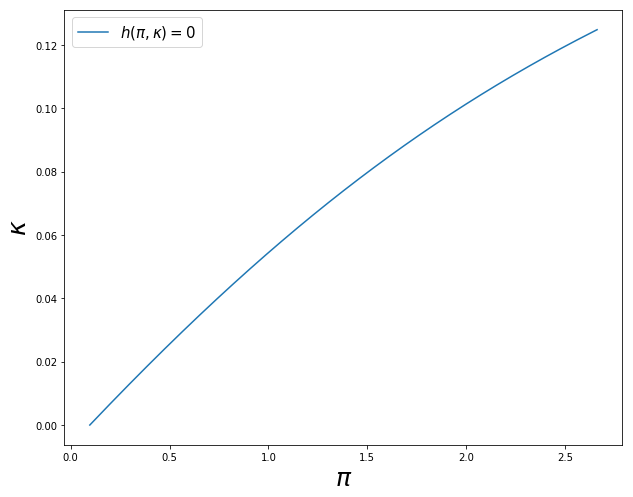

In [198]:
plt.figure(figsize=(10,8))
plt.plot(pil[0:500], kl[0:500], label=r"$h(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("h0.pdf", bbox_inches="tight")
plt.show()

In [199]:
all_params

{'C': 0.2,
 'M': 18,
 'alph': 0.8,
 'beta': 3.0,
 'c': 2,
 'eta': 6.0,
 'exp_lam': 2,
 'ff': 'Gamma',
 'gam_al': 2,
 'gam_bet': 2,
 'lamb': 5.0,
 'mu': 0.09,
 'p': 0.9,
 'par_al': 2,
 'par_xm': 2,
 'rho': 0.8,
 'sig': 0.3,
 'wei_k': 5,
 'wei_lam': 1}

# Gráficas conjuntas
---
# PARA RHO POSITIVO

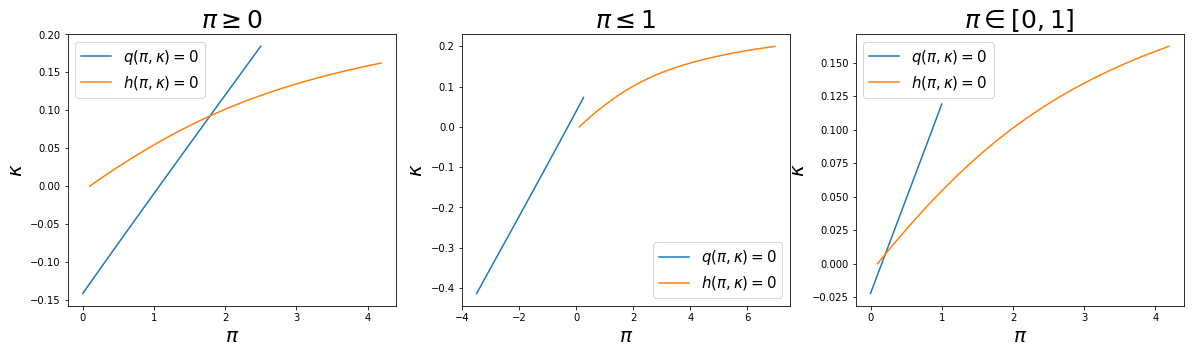

In [215]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[0:500], k_lvl1[0:500], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[0:650], kl[0:650], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[500:1750], k_lvl2[500:1750], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[0:800], kl[0:800], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:2000], k_lvl3[0:2000], label=r"$q(\pi, \kappa)=0$ ")
plt.plot(pil[0:650], kl[0:650], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("all_gammadist_eta6_rho_08.pdf", bbox_inches="tight")
plt.show()

# Gráficas para rho negativo

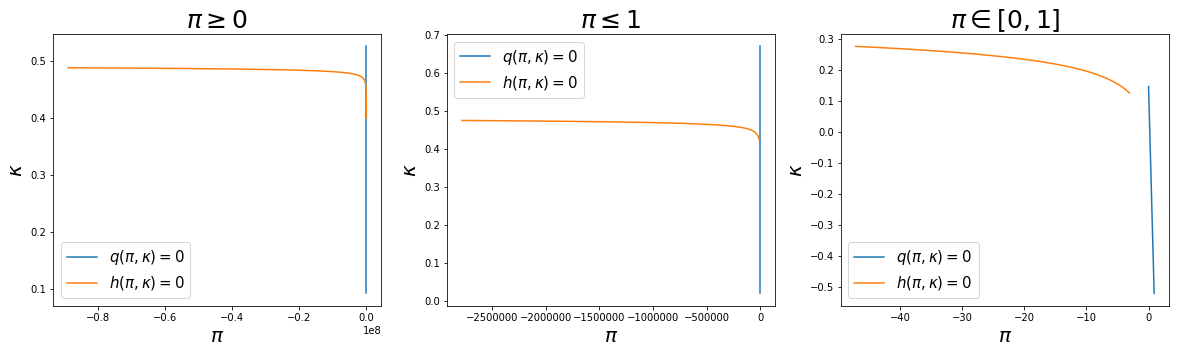

In [187]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[80:200], k_lvl1[80:200], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[1600:1950], kl[1600:1950], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[1300:1600], k_lvl2[1300:1600], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[1700:1900], kl[1700:1900], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:1800], k_lvl3[0:1800], label=r"$q(\pi, \kappa)=0$ ")
plt.plot(pil[500:1100], kl[500:1100], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("all_gammadist_eta8_rho_-05.pdf", bbox_inches="tight")
plt.show()

## Intersección

In [126]:
def find_inter(x1, x2, y1, y2):
    '''x_int = np.argmin(np.abs(x2-x1))
    y_int = np.argmin(np.abs(y2-y1))'''
    
    d_sq = ((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))**2
    
    #return x_int, y_int
    return np.argmin(d_sq)

In [127]:
'''idxx, idxy = find_inter(pil, p_lvl1, kl, k_lvl1)
idxx, idxy'''
idxx = find_inter(pil, p_lvl1, kl, k_lvl1)
idxx

416

In [78]:
# Caso 1

idx = np.argwhere(np.diff(np.sign(p_lvl1 - pil))).flatten()
print(p_lvl1[idx], kl[idx], idx)

idx = np.argwhere(np.diff(np.sign(k_lvl1 - kl))).flatten()
print(p_lvl1[idx], kl[idx], idx)

# Caso 2



# Caso 3

idx = np.argwhere(np.diff(np.sign(p_lvl3 - pil))).flatten()
#print(p_lvl3[idx], kl[idx])

[4.68984492] [0.15632816] [1875]
[0.78289145] [0.02609638] [313]


In [71]:
idx

array([729])

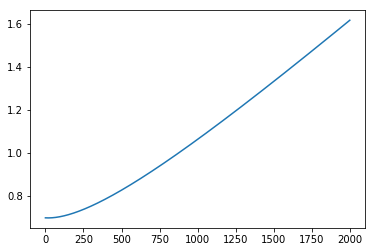

In [116]:
plt.plot(p_lvl1 - k_lvl1)
plt.show()

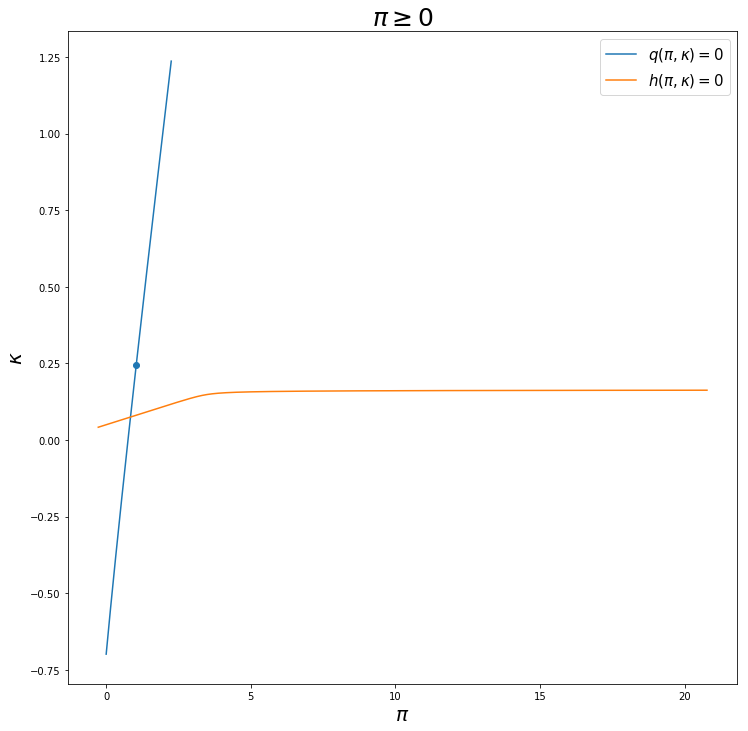

In [128]:
plt.figure(figsize=(12,12))

plt.plot(p_lvl1[0:900], k_lvl1[0:900], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[500:1950], kl[500:1950], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.scatter(p_lvl1[416], k_lvl1[416])#k_lvl1[337])

plt.show()